<a href="https://colab.research.google.com/github/Colmeman/eniac-data-cleaning-and-storytelling/blob/main/ENIAC_Data_Cleaning_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries and loading the Data


In [ ]:
# Important libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Creating a Funtion for a shareable link from Google
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"


# Google Drive file ids
files_id = {
    "brands": "1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD",
    "orderlines": "1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG",
    "orders": "1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ",
    "products":"1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU"
}

# Reading in the data
brands = pd.read_csv(gd_path(files_id['brands']), sep =',')
orderlines = pd.read_csv(gd_path(files_id['orderlines']), sep =',')
orders = pd.read_csv(gd_path(files_id['orders']), sep =',')
products = pd.read_csv(gd_path(files_id['products']), sep =',')

# Overview and investigating the Data

Performing Exploratory Data Analysis (EDA)

Here’s a description of each table and its columns:

+ orders.csv – Every row in this file represents an order.

> + order_id – a unique identifier for each order
+ created_date – a timestamp for when the order was created
+ total_paid – the total amount paid by the customer for this order, in euros
state
+ “Shopping basket” – products have been placed in the shopping basket
+ “Place Order” – the order has been placed, but is awaiting shipment details
+ “Pending” – the order is awaiting payment confirmation
+ “Completed” – the order has been placed and paid, and the transaction is completed.
+ “Cancelled” – the order has been cancelled and the payment returned to the customer.


+ orderlines.csv – Every row represents each one of the different products involved in an order.


> + id – a unique identifier for each row in this file
+ id_order – corresponds to orders.order_id
+ product_id – an old identifier for each product, nowadays not in use
+ product_quantity – how many units of that product were purchased on that order
+ sku – stock keeping unit: a unique identifier for each product
+ unit_price – the unitary price (in euros) of each product at the moment of placing that order
+ date – timestamp for the processing of that product

+ products.csv


> + sku – stock keeping unit: a unique identifier for each product
name – product name
+ desc – product description
+ in_stock – whether or not the product was in stock at the moment of the data extraction
+ type – a numerical code for product type
+ promo_price – promotional price, in euros

+ brands.csv


> + short – the 3-character code by which the brand can be identified in the first 3 characters of products.sku
+ long – brand name

In [ ]:
brands.describe()

,short,long
count,187,187
unique,187,181
top,8MO,Mophie
freq,1,2


In [ ]:
brands.isna().any()

short    False
long     False
dtype: bool

In [ ]:
brands.columns

Index(['short', 'long'], dtype='object')

In [ ]:
brands.isna().sum()

short    0
long     0
dtype: int64

In [ ]:
brands.value_counts()

short  long       
8MO    8Mobility      1
PRO    Promise        1
OWC    OWC            1
PAC    Pack           1
PAR    Parrot         1
                     ..
JBL    JBL            1
JMO    Just Mobile    1
JOB    Joby           1
JYB    Jaybird        1
ZEP    Zepp           1
Length: 187, dtype: int64

In [ ]:
print(brands.shape)
brands.head(10)

(187, 2)


,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
5,ALL,Allocacoc
6,AP2,Apple
7,APP,Apple
8,BAN,Band&Strap
9,BEA,Beats


In [ ]:
print(orderlines.shape)
orderlines.head(20)

(293983, 7)


,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
9,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11


In [ ]:
print(orders.shape)
orders.head()

(226909, 4)


,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [ ]:
brands.hist

<bound method hist_frame of     short       long
0     8MO  8Mobility
1     ACM       Acme
2     ADN     Adonit
3     AII      Aiino
4     AKI     Akitio
..    ...        ...
182   XOO     Xoopar
183   XRI     X-Rite
184   XTO      Xtorm
185   ZAG   ZaggKeys
186   ZEP       Zepp

[187 rows x 2 columns]>

In [ ]:
print(products.shape)
products.head()

(19326, 7)


,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [ ]:
products.name.nunique()

10373

In [ ]:
products.name.nunique()

10373

# Data Cleaning


In [ ]:
# For Gustavo
brands_g = brands.copy()
orders_g = orders.copy()
orderlines_g = orderlines.copy()
products_g = products.copy()

##Orders

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
orders_g

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket


In [ ]:
orders_g[["created_date"]].min()

created_date    2017-01-01 00:07:19
dtype: object

In [ ]:
orders_g[["created_date"]].max()

created_date    2018-03-14 13:58:36
dtype: object

In [ ]:
#Blackfriday Nov 24 2017
#Bluemonday Nov 28 2017
# Christmas
# Winter Sales
# Summer Sales

In [ ]:
orders_g.nunique()

order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

In [ ]:
orders_g.duplicated().sum()

0

In [ ]:
orders_g = orders_g.loc[orders_g.state.str.contains('Completed'), :]

In [ ]:
orders_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      46605 non-null  int64  
 1   created_date  46605 non-null  object 
 2   total_paid    46605 non-null  float64
 3   state         46605 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
orders_g.groupby(['state'])[['total_paid']].sum()

,total_paid
state,
Completed,15910079.24


In [ ]:
orders_g.groupby(['state'])[['total_paid']].mean()

,total_paid
state,
Completed,341.381381


In [ ]:
orders_g = orders_g.loc[~orders.total_paid.isna(), :]

In [ ]:
orders_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226619
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      46605 non-null  int64  
 1   created_date  46605 non-null  object 
 2   total_paid    46605 non-null  float64
 3   state         46605 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
orders_g["created_date"] = pd.to_datetime(orders_g["created_date"])

##Orderlines

In [ ]:
orderlines_g = orderlines.copy()

In [ ]:
orderlines_g = orderlines_g.drop_duplicates()

In [ ]:
orderlines_g.loc[orderlines.unit_price.str.contains("\d{1}\.\d+\.\d+"), 'unit_price']

6         1.137.99
11        2.565.99
15        3.278.99
43        2.616.99
59        2.873.99
            ...   
293862    2.999.00
293887    3.497.00
293889    3.075.00
293911    1.329.00
293936    1.329.00
Name: unit_price, Length: 36169, dtype: object

In [ ]:
unit_price_fixed = orderlines_g.loc[orderlines.unit_price.str.contains("\d+\.\d+\.\d+"), 'unit_price'].str.split('.').apply(lambda lst: lst[0] + lst[1] + '.' + lst[2])
unit_price_fixed #list with the numbers greater than 1000 and the first "." removed.

6         1137.99
11        2565.99
15        3278.99
43        2616.99
59        2873.99
           ...   
293862    2999.00
293887    3497.00
293889    3075.00
293911    1329.00
293936    1329.00
Name: unit_price, Length: 36169, dtype: object

In [ ]:
orderlines_g['unit_price'].update(unit_price_fixed) #column updated with the new data

In [ ]:
orderlines_g['unit_price'].to_frame()

,unit_price
0,18.99
1,399.00
2,474.05
3,68.39
4,23.74
...,...
293978,42.99
293979,141.58
293980,9.99
293981,19.99


In [ ]:
orderlines_g = orderlines_g.astype({'unit_price':'float'}) #column converted to float
print(orderlines_g.dtypes)

id                    int64
id_order              int64
product_id            int64
product_quantity      int64
sku                  object
unit_price          float64
date                 object
dtype: object


In [ ]:
orderlines_g

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
orderlines_g = orderlines_g.loc[~orderlines_g.unit_price.isna(), :]

In [ ]:
orderlines_g

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
orderlines_g['date'] =pd.to_datetime(orderlines_g['date'])

In [ ]:
orderlines_g['date_YYYY_MM_DD'] =pd.to_datetime(orderlines_g['date']).dt.date

In [ ]:
orderlines_g['time'] =pd.to_datetime(orderlines_g['date']).dt.time

In [ ]:
orderlines_g['year'] =pd.to_datetime(orderlines_g['date']).dt.year

In [ ]:
orderlines_g['month'] =pd.to_datetime(orderlines_g['date']).dt.strftime('%B')

In [ ]:
orderlines_g['weekday'] =pd.to_datetime(orderlines_g['date']).dt.day_name()

In [ ]:
orderlines_g['day'] =pd.to_datetime(orderlines_g['date']).dt.day

In [ ]:
orderlines_g['quarter'] =pd.to_datetime(orderlines_g['date']).dt.quarter

In [ ]:
orderlines_g['product_brand'] = orderlines_g.sku.str.extract('(\w{3})')

In [ ]:
orderlines_g

,id,id_order,product_id,product_quantity,sku,unit_price,date,date_YYYY_MM_DD,time,year,month,weekday,day,quarter,product_brand
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,2017-01-01,00:07:19,2017,January,Sunday,1,1,OTT
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,2017-01-01,00:19:45,2017,January,Sunday,1,1,LGE
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,2017-01-01,00:20:57,2017,January,Sunday,1,1,PAR
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,2017-01-01,00:51:40,2017,January,Sunday,1,1,WDT
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2017-01-01,01:06:38,2017,January,Sunday,1,1,JBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,2018-03-14,13:57:25,2018,March,Wednesday,14,1,JBL
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,2018-03-14,13:57:34,2018,March,Wednesday,14,1,PAC
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,2018-03-14,13:57:41,2018,March,Wednesday,14,1,APP
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,2018-03-14,13:58:01,2018,March,Wednesday,14,1,BEZ


In [ ]:
orderlines_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293983 entries, 0 to 293982
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   date_YYYY_MM_DD   293983 non-null  object        
 8   time              293983 non-null  object        
 9   year              293983 non-null  int64         
 10  month             293983 non-null  object        
 11  weekday           293983 non-null  object        
 12  day               293983 non-null  int64         
 13  quarter           293983 non-null  int64         
 14  prod

##Products

In [ ]:
products_g = products.copy() #Start from here

In [ ]:
products_g = products_g.loc[~products_g.desc.isna(), :]

In [ ]:
products_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19319 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19319 non-null  object
 1   name         19319 non-null  object
 2   desc         19319 non-null  object
 3   price        19273 non-null  object
 4   promo_price  19319 non-null  object
 5   in_stock     19319 non-null  int64 
 6   type         19269 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [ ]:
products_g = products_g.drop_duplicates()

In [ ]:
products_g

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [ ]:
two_dot_percentage = ((products_g.price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / products.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

The 2 dot problem represents 1.95% of the rows in our DataFrame


In [ ]:
products_g = products_g.loc[~products_g.price.isna(), :] #Removing the NaN in price

In [ ]:
price_fixed = products_g.loc[products_g.price.str.contains("\d+\.\d+\.\d+"), 'price'].str.split('.').apply(lambda lst: lst[0] + lst[1] + '.' + lst[2]) #list with the numbers greater than 1000 and the first "." removed.

In [ ]:
products_g['price'].update(price_fixed)#column updated with the new data

<ipython-input-47-c2dc9c088bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_g['price'].update(price_fixed)#column updated with the new data


In [ ]:
products_g

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


In [ ]:
# price = products_g['price']
# promo_price = products_g['promo_price']

# for pp_idx, p in enumerate(price):
#   p = str(p)
#   print('step-1')
#   print(p)
#   print(promo_price[pp_idx])
#   if ("." in p):
#     promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
#     promo_price[pp_idx] = promo_price[pp_idx][:p.index(".")] + "." + promo_price[pp_idx][p.index("."):]
#     print('step-2')
#     print(p)
#     print(promo_price[pp_idx])
#     if round(float(promo_price[pp_idx])) > round(float(p)):
#       promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
#       promo_price[pp_idx] = promo_price[pp_idx][:p.index(".")-1] + "." + promo_price[pp_idx][p.index(".")-1:]
#       print('step-3')
#       print(p)
#       print(promo_price[pp_idx])
#   else:
#     promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
#     promo_price[pp_idx] = promo_price[pp_idx][:len(p)] + "." + promo_price[pp_idx][len(p):]
#     print('step-4')
#     print(p)
#     print(promo_price[pp_idx])
#     if round(float(promo_price[pp_idx])) > round(float(p)):
#       promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
#       promo_price[pp_idx] = promo_price[pp_idx][:len(p)-1] + "." + promo_price[pp_idx][len(p)-1-1:]
#       print('step-5')
#       print(p)
#       print(promo_price[pp_idx])
  #print('-----------')
  #It seems there is a problem with the erased columns

In [ ]:
price = products_g['price']
promo_price = products_g['promo_price']

for pp_idx, row in products_g.iterrows():
    p = str(row['price'])
    print('step-1')
    print(p)
    print(row['promo_price'])
    if ("." in p):
        promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
        promo_price[pp_idx] = promo_price[pp_idx][:p.index(".")] + "." + promo_price[pp_idx][p.index("."):]
        print('step-2')
        print(p)
        print(promo_price[pp_idx])
        if round(float(promo_price[pp_idx])) > round(float(p)):
            promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
            promo_price[pp_idx] = promo_price[pp_idx][:p.index(".")-1] + "." + promo_price[pp_idx][p.index(".")-1:]
            print('step-3')
            print(p)
            print(promo_price[pp_idx])
    else:
        promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
        promo_price[pp_idx] = promo_price[pp_idx][:len(p)] + "." + promo_price[pp_idx][len(p):]
        print('step-4')
        print(p)
        print(promo_price[pp_idx])
        if round(float(promo_price[pp_idx])) > round(float(p)):
            promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
            promo_price[pp_idx] = promo_price[pp_idx][:len(p)-1] + "." + promo_price[pp_idx][len(p)-1-1:]
            print('step-5')
            print(p)
            print(promo_price[pp_idx])

products_g['promo_price'] = promo_price

# Code corrected by using Using iterrows()


step-1
59.99
499.899
step-2
59.99
49.9899
step-1
59
589.996
step-4
59
58.9996
step-1
59
569.898
step-4

<ipython-input-50-67c3d64c6d60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
<ipython-input-50-67c3d64c6d60>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_price[pp_idx] = promo_price[pp_idx][:p.index(".")] + "." + promo_price[pp_idx][p.index("."):]
<ipython-input-50-67c3d64c6d60>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_price[pp_idx] = promo_price[


59
56.9898
step-1
25
229.997
step-4
25
22.9997
step-1
34.99
31.99
step-2
34.99
31.99
step-1
45
420.003
step-4
45
42.0003
step-1
18.99
146.471
step-2
18.99
14.6471
step-1
36.99
274.694
step-2
36.99
27.4694
step-1
74
669.904
step-4
74
66.9904
step-1
35
330.003
step-4
35
33.0003
step-1
35
330.003
step-4
35
33.0003
step-1
49.99
449.878
step-2
49.99
44.9878
step-1
35
330.003
step-4
35
33.0003
step-1
89
849.904
step-4
89
84.9904
step-1
20
179.891
step-4
20
17.9891
step-1
24.95
249.889
step-2
24.95
24.9889
step-1
89
849.904
step-4
89
84.9904
step-1
69.99
699.864
step-2
69.99
69.9864
step-1
9.99
7.986
step-2
9.99
7.986
step-1
35
350.005
step-4
35
35.0005
step-1
89
849.904
step-4
89
84.9904
step-1
35
349.896
step-4
35
34.9896
step-1
49.95
399.905
step-2
49.95
39.9905
step-1
49.99
499.851
step-2
49.99
49.9851
step-1
79
759.904
step-4
79
75.9904
step-1
69.99
56.991
step-2
69.99
56.991
step-1
25
240.004
step-4
25
24.0004
step-1
16.49
149.895
step-2
16.49
14.9895
step-1
59.99
502.102
step-2
59.99


<ipython-input-50-67c3d64c6d60>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_price[pp_idx] = promo_price[pp_idx].replace(".", "")
<ipython-input-50-67c3d64c6d60>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_price[pp_idx] = promo_price[pp_idx][:p.index(".")-1] + "." + promo_price[pp_idx][p.index(".")-1:]
<ipython-input-50-67c3d64c6d60>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_price[pp_idx] = promo_pr

Streaming output truncated to the last 5000 lines.
39.99
349.896
step-2
39.99
34.9896
step-1
75.99
709.943
step-2
75.99
70.9943
step-1
106.99
949.947
step-2
106.99
949.947
step-3
106.99
94.9947
step-1
163.99
1.349.949
step-2
163.99
134.9949
step-1
19.95
159.902
step-2
19.95
15.9902
step-1
19.95
159.902
step-2
19.95
15.9902
step-1
74.99
599.918
step-2
74.99
59.9918
step-1
26.99
199.892
step-2
26.99
19.9892
step-1
537
4.299.904
step-4
537
429.9904
step-1
74.99
579.905
step-2
74.99
57.9905
step-1
74.99
579.905
step-2
74.99
57.9905
step-1
189.99
1.899.954
step-2
189.99
189.9954
step-1
2049.946
2.049.946
step-2
2049.946
2049.946
step-1
269.99
2.380.046
step-2
269.99
238.0046
step-1
290
2.599.939
step-4
290
259.9939
step-1
639
5.803.305
step-4
639
580.3305
step-1
269
2.150.001
step-4
269
215.0001
step-1
812
4.590.014
step-4
812
459.0014
step-1
36.99
169.896
step-2
36.99
16.9896
step-1
36.99
169.896
step-2
36.99
16.9896
step-1
36.99
169.896
step-2
36.99
16.9896
step-1
419
3.190.008
step-4
419

<ipython-input-50-67c3d64c6d60>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_g['promo_price'] = promo_price


In [ ]:
products_g = products_g.astype({'price':'float', 'promo_price':'float'}) #column converted to float
print(products_g.dtypes)

sku             object
name            object
desc            object
price          float64
promo_price    float64
in_stock         int64
type            object
dtype: object


In [ ]:
filtered_df = products_g[products_g['promo_price'] > products_g['price']]
filtered_df #it seems there is some promo_price still higher than the price

,sku,name,desc,price,promo_price,in_stock,type
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,24.9889,0,13835403
19,APP0234,Apple Dock Connector to VGA,Dock Connector to VGA IOS.,35.00,35.0005,0,13955395
39,JMO0026,Just Mobile Lazy Couch Support Mac and iPad,Mac and iPad small lift stand.,19.95,19.9892,0,8696
52,BLL0008,BlueLounge CableDrop Pack 6 Black,Cable management Mac iPhone iPad and iPod.,11.99,11.9911,0,12285400
55,BLL0012,Milo BlueLounge support iPhone and iPod white,Desktop support iPhone and iPod.,14.99,14.9919,0,1216
...,...,...,...,...,...,...,...
18525,WDT0399,WD My Cloud Home 2TB USB 3.0,1-bay NAS server for Mac and PC,189.99,189.9954,0,11935397
18624,IFX0176,Full iFixit iPhone Battery Kit Battery change 7,Replacement Kit Internal Battery for Apple iPh...,62.99,62.9902,1,21485407
18663,QNA0259,QNAP rack rail kit,Rail kit for rackmount NAS servers in 1U,42.99,42.9901,0,1404
18855,APP2630,Siri Apple Remote 2017,Remote control for Apple TV Media Player Apple.,69.00,69.0003,1,54864259


In [ ]:
products_g['price'] = products_g['price'].round(2)
products_g['promo_price'] = products_g['promo_price'].round(2)

In [ ]:
price_promo_higher_percentage = (((products_g['promo_price'] > products_g['price']).value_counts()[1] / products.shape[0])*100).round(2)
print(f"The price promo higher than price represents {price_promo_higher_percentage}% of the rows in our DataFrame")

The price promo higher than price represents 0.42% of the rows in our DataFrame


In [ ]:
products_g

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,0,1392


In [ ]:
filtered_df_rounded = products_g[products_g['promo_price'] > products_g['price']]
filtered_df_rounded #When rounding the amount of promo price higher gets smaller

,sku,name,desc,price,promo_price,in_stock,type
15,MOS0021,Clearguard Moshi MacBook Pro and Air,Keyboard Protector MacBook Pro 13-inch Retina ...,24.95,24.99,0,13835403
39,JMO0026,Just Mobile Lazy Couch Support Mac and iPad,Mac and iPad small lift stand.,19.95,19.99,0,8696
477,PIE0007,Internal Battery for iPhone 4,Replacement AC Adapter for Apple iPhone 4.,14.95,14.99,1,21485407
479,PIE0010,Internal Battery for iPhone 3GS,Replacement AC Adapter for Apple iPhone 3GS.,14.95,14.99,1,21485407
562,JAB0027,Jabra Revo Wireless headphones HD Black,IPhone iPad iPod headphones and Bluetooth stereo.,199.94,199.99,0,5384
...,...,...,...,...,...,...,...
15654,WAC0238,Digital Pen Wacom stylus CTH-470S / 670s Silver,Intuos Pen digital pen for Touch and pressure ...,34.90,34.99,1,1229
17499,ALL0024,Allocacoc PowerCube rewirable Regleta White / ...,The smartest solution for travel anywhere in t...,24.95,24.99,1,5395
17679,IHE0020-A,Open - iHealth Box 50 Reagent Strips glucímetros,Blood glucose test strips in the iHealth glucí...,19.95,19.99,0,1298
18525,WDT0399,WD My Cloud Home 2TB USB 3.0,1-bay NAS server for Mac and PC,189.99,190.00,0,11935397


In [ ]:
price_promo_higher_percentage_rounded = (((products_g['promo_price'] > products_g['price']).value_counts()[1] / products.shape[0])*100).round(2)
print(f"The price promo higher than price represents {price_promo_higher_percentage_rounded}% of the rows in our DataFrame")

The price promo higher than price represents 0.42% of the rows in our DataFrame


In [ ]:
products_g = products_g.loc[~(products_g['promo_price'] > products_g['price']), :]

In [ ]:
products_g

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,0,1392


##Products Categories

In [ ]:
category_type_df = products_g.copy()

In [ ]:
# category_type_df = category_type_df.astype({'type':'float'}) #column converted to float
# print(products_g.dtypes)

In [ ]:
category_type_df.groupby("type").count().nlargest(40, "sku")

,sku,name,desc,price,promo_price,in_stock
type,,,,,,
12175397,1084,1084,1084,1084,1084,1084
11865403,1052,1052,1052,1052,1052,1052
1298,828,828,828,828,828,828
11935397,562,562,562,562,562,562
11905404,461,461,461,461,461,461
1282,374,374,374,374,374,374
12635403,368,368,368,368,368,368
13835403,268,268,268,268,268,268
"5,74E+15",247,247,247,247,247,247


####Type Categories

Let's have a look at the first `type` to see if we can make categories from this column.

In [ ]:
category_type_df.loc[category_type_df["type"] == "11865403"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
13480,MOS0219,SenseCover Moshi Case Rosa iPhone 7/8 Plus,Cover with lid front opening and folding stand...,50.00,39.99,0,11865403
18144,NTE0132,NewerTech NuGuard KX X-treme iPhone 8/7 Case D...,Protective cover for massive drops NuGuard KX ...,60.99,25.99,0,11865403
1277,SHE0018,SwitchEasy NUDE Case Black iPhone 6,Transparent thin shell for iPhone 6.,24.99,13.99,0,11865403
17635,APP2518,Apple Silicon Case iPhone Case 8 Plus / 7 Plus...,Ultrathin silicone case and microfiber premium...,45.00,43.00,0,11865403
17602,MOS0232,Vesta Moshi Case Rosa Floral iPhone X,retro sophistication to your iPhone with raise...,40.00,33.99,1,11865403
12504,DIN0007,Disney TPU Star Wars R2-D2 iPhone 6 / 6S,Case with Star Wars character for iPhone 6 / 6S,12.95,10.99,0,11865403
13304,OTT0146,Otterbox iPhone Case 8/7 Black Symmetry,resistant cover and thin beveled edges for iPh...,34.99,22.99,0,11865403
10850,MOS0175,Moshi iGlaze Case Napa iPhone 6 / 6S Plus Blue...,Housing double protective coating for iPhone 6...,49.99,39.99,0,11865403
18170,OTT0178,OtterBox iPhone Case Etui 8 Symmetry Dark Blue,Symmetry OtterBox protective sleeve one-piece ...,34.99,22.99,1,11865403
545,MOS0087,Moshi iGlaze iPhone case Kamaleon SE / 5s / 5 ...,IPhone Case SE / 5s / 5 with sleek aluminum su...,55.00,25.99,0,11865403


Looks like this is a category of phone cases.

Let's have a look at the 2nd largest type to see if that's also a clear category.

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
12392,PAC1425,Synology DS916 + Pack | 2GB RAM | WD 24TB Network,Synology DS916 + with 2GB RAM memory + 24TB (4...,1600.80,1426.37,0,12175397
1858,QNA0076,QNAP TS-231 NAS server Mac and PC,Two bay NAS server for Mac and PC.,192.39,183.99,0,12175397
11564,PAC1275,Pack QNAP TS-251 | WD 12TB Network,Pack QNAP TS-251 + 12TB (2x6TB) Network WD Har...,850.89,716.99,0,12175397
14684,PAC1754,QNAP TS-231P NAS,NAS with 12TB capacity Seagate Hard Drives for...,776.57,610.18,0,12175397
2679,QNA0119,QNAP TVS-871-i5 | 8GB RAM Mac and PC Server Nas,8-bay NAS Server for Mac and PC.,1995.29,1994.99,0,12175397
15891,PAC1995,Synology DS1517 + | 2GB RAM | 50TB (5x10TB) Se...,NAS with 2GB of RAM and 50TB for Mac and PC,2805.81,2163.96,0,12175397
14682,PAC1752,QNAP TS-231P NAS,NAS 6TB capacity Seagate Hard Drives for Mac a...,496.57,422.18,0,12175397
17616,PAC2355,DS418J Synology NAS Server | 24TB (4x6TB) Seag...,4 bay NAS server capable of transmitting H.265...,1434.95,1060.37,0,12175397
14785,PAC1717,Pack QNAP TS-451A NAS 8GB RAM l l 40TB (4x10TB...,NAS TS-451A with 16GB of RAM for Mac and PC,636.47,560.99,1,12175397
1684,PAC1797,Synology DS1815 Pack + | 8GB RAM | Seagate 64T...,DS1815 + Nas with 8GB RAM and 64TB capacity (8...,3916.89,3322.75,0,12175397


Looks like this category is full of servers.

I wonder how many `type`s account for most of our products?

In [ ]:
category_type_df.loc[category_type_df["type"] == "1298"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
12840,BNQ0028-A,"Open - GW2765HT Monitor Benq 27 """,LED 27-inch monitor flicker-free technology an...,364.00,346.65,0,1298
17344,TUC0306-A,Open - Tucano Nido Hard-Shell Case MacBook Pro...,Protective cover with slip rubber feet for Mac...,34.90,26.39,0,1298
17678,IHE0017-A,Open - iHealth Align Intelligent Mini glucímetro,MiniLector glucímoco connected to iPhone.,199.90,157.56,0,1298
14844,SAT0036-A,Open - Satechi Aluminum HDD Dock Mac,Dock with DVD HDD SATA SSDs and two USB 3.0 po...,69.99,34.97,0,1298
15288,APP1835-A,"Open - Apple MacBook Pro 13 ""with Touch Bar 33...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2599.00,2373.85,0,1298
1892,GTE0012-A,(Open) G-Tech G-DRIVE USB 3.0 Hard Disk 2TB,external hard drive G-Technology for Mac or PC...,235.00,169.90,0,1298
16963,HOC0004-A,Open - Nike Hoco Series Apple Watch Strap 42mm...,Silicone Strap Sports Watch 42mm Apple,45.00,18.56,0,1298
14709,SAT0013-A,"(Open) Satechi External Case 25 ""Aluminum HDD ...",Outer carton for HDDs and SDD format 25 inches...,44.99,29.99,0,1298
14805,MUV0169-A,"Open - Muvit On / Off iPad Case Pro 97 ""Black",Cover and support functions on and off for iPa...,22.95,13.07,0,1298
14656,LAC0131-A,(Open) LaCie Rugged USB 3.0 Thunderbolt SSD 250GB,Wireless Portable Hard Thunderbolt and USB 3.0...,259.99,227.60,0,1298


Others or different things

In [ ]:
category_type_df.loc[category_type_df["type"] == "11935397"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
12927,SAM0104,Samsung Pro + Memory Card microSDXC UHS Class ...,Memory Card microSDXC UHS Class 3 64GB with SD...,84.28,49.99,0,11935397
13092,WDT0338,WD My Passport Ultra Hard Drive 4TB Mac and PC...,external hard drive with 4TB capacity and USB ...,189.99,158.99,0,11935397
14630,WDT0363,4TB WD My Passport External Hard Drive USB 3.0...,4TB External Hard Drive USB 3.0 with Mac and P...,179.99,137.00,0,11935397
17312,LAC0236,LaCie d2 USB 3.0 Hard Drive 6TB,External Hard Disk 1 bay for Mac and PC,229.00,201.99,1,11935397
858,PAC0336,OWC Mercury Elite Pro QX2 Quad + 12TB,RAID 4 bay eSata / FW800 / FW400 / USB3 + 12TB...,810.99,614.37,0,11935397
15702,LAC0227,5TB Lacie Rugged Hard Disk Thunderbolt USB-C,"5TB hard disk rugged, compact Thunderbolt and ...",299.99,249.99,0,11935397
13492,SAN0159,SanDisk Cruzer Dial Flash Drive 32GB USB 2.0,Ultra compact flash drive with built-dial for ...,15.99,13.00,1,11935397
3089,SEA0092,"Seagate Expansion 2TB USB 3.0 Hard Disk 25 ""Black",25-inch External Hard Drive 2TB USB 3.0 for Ma...,104.99,92.99,1,11935397
16760,GTE0105,G-Technology G-RAID Thunderbolt Hard Drive 16T...,16TB RAID disk with 2 bays and removable disks...,1047.99,859.99,1,11935397
12740,PAC1474,OWC Mercury Elite Pro Dual RAID FW800 / USB3 |...,OWC Mercury Pro Dual + 6TB (2x3TB) Hard Drives...,380.99,300.18,0,11935397


External storage, HD, usb flash

In [ ]:
category_type_df.loc[category_type_df["type"] == "11905404"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
1445,TRC0009,Motion monitor activity tractive,Monitor activity monitoring your pet.,79.99,49.99,0,11905404
12528,MOO0008,Now Moov Red Coach Activity Monitor,Activity monitor with a personal trainer for i...,79.95,49.99,0,11905404
12561,GEE0007,Lovers Live Geeksme Black Watch Monitor activity,Clock activity monitor for iPhone iPad and iPod,79.95,69.99,0,11905404
894,FIT0022,Bracelet Flex fitbit activity monitor orange,Control activity bracelet with two interchange...,99.99,89.99,0,11905404
18407,TRK0013,Trackr Pixel Locator - Black White Silver Pack 3,Bluetooth locator objects APP for iPhone,49.99,45.99,1,11905404
11361,ELG0044,Elgato Avea Bluetooth Flare Lamp,bluetooth multimode lamp lighting for iPhone i...,99.95,82.99,0,11905404
1863,RUT0009,Orbit runtastic fitness monitor activity and s...,Bracelet sport and activity control sleep for ...,119.99,49.99,0,11905404
11398,PHI0071,Philips Hue White Set 2 bulbs 9.5W E27 + A60 B...,Kit 2 white bulbs + bridge lighting system HUE.,79.95,77.90,0,11905404
1092,OLL0013,Olloclip 4-in-1 Combo lens housing iPhone 5 / ...,Wide angle fisheye and macro macro x10 x15 mor...,99.99,69.99,0,11905404
18671,LIT0007,Gizmos and Gadgets LittleBits 2nd Edition Kit ...,Toolbox kit enabled App Inventor,249.99,224.99,0,11905404


Iphone electronic accesories devices gadgets

In [ ]:
category_type_df.loc[category_type_df["type"] == "1282"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
18883,PAC2286,"Second hand - Apple LED Cinema Display 24 """,Monitor Refurbished Apple Cinema Display 24 inch,899.00,499.00,0,1282
262,PAC0183,"Apple MacBook Pro 133 ""25GHz | 8GB RAM | 500GB...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1319.00,1279.99,0,1282
2242,APP0969,"Apple MacBook Pro Retina 13 ""i7 3GHz | RAM 16G...",New MacBook Pro 13-inch Retina Display i7 3GHz...,2249.00,2098.99,0,1282
8366,APP1323,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 8GB ...",IMac desktop computer 27 inch 8GB RAM 2TB 5K R...,2489.00,2371.58,0,1282
1352,APP0899,Apple Mac mini Core i5 14GHz | 4GB RAM | 500GB...,PC Mac mini Core i5 4GB 500GB 14GHz (MGEM2YP /...,555.59,522.00,0,1282
2085,APP0942,"Apple MacBook Air 11 ""i7 22 Ghz | 4GB RAM | 25...",laptop MacBook Air 11 inch i7 22GHz 4GB 256GB ...,1369.00,1277.99,0,1282
2237,APP0964,"Apple MacBook Pro Retina 13 ""i5 27 Ghz | 8GB R...",New MacBook Pro 13-inch Retina screen i5 256GB...,1649.00,1537.99,0,1282
8564,PAC1588,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",Desktop computer iMac 27-inch 3.2GHz Core i5 5...,4289.00,3532.99,0,1282
14734,BASEiMAC5,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 8GB ...",Desktop computer iMac 27-inch 3.2GHz Core i5 5...,2689.00,2521.99,0,1282
15578,AP20021,"Second hand - Apple iMac 215 ""Core i5 Quad-Cor...",IMac used i5 215 inch quad-core 27GHz | 8GB RA...,879.00,826.58,0,1282


Computers

In [ ]:
category_type_df.loc[category_type_df["type"] == "12635403"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
831,GRT0311,CinemaSeat Griffin iPad sleeve black Air,Funda iPad Air with support for the car.,39.99,29.90,0,12635403
11970,AP20111,"Like new - Apple iPad Smart Cover Pro 97 ""Midn...",Second hand Case iPad Pro 97-inch,79.00,39.99,0,12635403
3091,NDE0015,Ndevr children iPadding Case iPad Air 1 & 2 Blue,Housing with special animal design kids for iP...,44.99,29.99,0,12635403
2311,LOG0157,Logitech AnyAngle case with stand Black iPad A...,Cover with multiposition support for iPad Air 2.,71.99,64.99,0,12635403
17998,STM0101,"Dux STM iPad Case 97 ""Black 2017",Compatible with protective sheath 97 inches Ca...,49.55,36.99,1,12635403
11988,APP1544,Apple Smart Cover iPad Mini 4 Lila,Polyurethane Smart Cover iPad Mini 4.,45.00,36.63,0,12635403
14761,MAC0132-A,Open - Macally Case / Stand Shell iPad Pro 9.7...,Support housing and polyurethane cases and cas...,29.95,15.64,0,12635403
11968,APP1526,"Apple iPad Smart Cover Pro 97 ""Lila",Smart sleeve with different positions for case...,59.00,47.52,0,12635403
12174,APP1549,Case Apple iPad Mini 4 Silicone Case Mint,Protective cover ultrafine silicone cases mini 4,69.00,57.00,0,12635403
11984,APP1536,"Apple iPad Silicone Case Pro 97 ""Yellow",Silicone light cover and soft touch for iPad P...,79.00,75.00,0,12635403


Case for Ipad

In [ ]:
category_type_df.loc[category_type_df["type"] == "13835403"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
11685,TUC0258,Tucano Nido Hard-Shell Case MacBook Pro Retina...,Rigid housing with rubber feet for MacBook Ret...,29.90,24.99,0,13835403
11653,UAG0033,"UAG Ice Retina MacBook Pro Case 13 ""Transparent",rigid and lightweight MacBook Pro Retina 13 in...,69.95,64.99,0,13835403
18198,MMW0026,"My MW Case MacBook Air 13 ""Shade Anthracite",Avoid shock and damage to your MacBook Air 13-...,29.95,20.99,0,13835403
1801,SPE0141,Speck SeeThru Clear Ipads housing 11 '' Transp...,Casing with smooth finish for MacBook Air 11.,49.90,39.99,0,13835403
18699,NTE0111-A,Open - NewerTech NuGuard Snap-on Case MacBook ...,Reconditioned Protector for MacBook Pro 13-inc...,42.99,9.00,0,13835403
1850,AII0075,"Aiino MacBook Pro Retina Case 15 ""Green Mate",Protective Cover for MacBook Pro Retina 15 inc...,24.99,22.99,0,13835403
12641,SPE0173,"Speck SeeThru Case Macbook Pro Retina 15 ""Rosa",Protective Case for MacBook Pro 15-inch Retina,49.90,36.99,0,13835403
1055,BOO0084,Booq Taipan Superslim MacBook Pro Retina case ...,lightweight case for MacBook Air / Pro 13 inch...,69.99,69.99,0,13835403
18212,MMW0018,"My MW Case MacBook Pro 15 ""(Late 2016) Black",Avoid shock and damage to your MacBook Pro 15-...,29.99,20.99,1,13835403
15862,BEZ0178,Be.ez LArobe MacBook Pro Retina ONE sleeve 13 ...,Neoprene Sleeve for MacBook Pro Retina 13 inches,29.95,24.99,0,13835403


Laptop Protection, Case

In [ ]:
category_type_df.loc[category_type_df["type"] == "5,74E+15"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
4929,PAC1043,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB |...",IMac desktop computer 27 inch 5K Retina i7 4GH...,3649.00,3080.99,0,"5,74E+15"
16210,PAC2103,"Apple iMac 27 ""Core i7 42GHz 5K Retina | 64GB ...",IMac desktop computer 27 inch Retina 5K RAM 64...,4645.59,3617.00,0,"5,74E+15"
9972,PAC0980,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 16GB...",IMac desktop computer 27 inch 5K Retina i5 3.2...,3409.00,2979.99,0,"5,74E+15"
9525,PAC0960,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 16GB...",IMac desktop computer 27 inch 5K Retina i5 3.2...,2569.00,2415.00,0,"5,74E+15"
7208,PAC1615,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,4369.00,3469.99,0,"5,74E+15"
3784,APP1382,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 8GB | ...",IMac desktop computer 27 inch 5K Retina 8GB RA...,3649.00,3473.58,0,"5,74E+15"
16249,PAC2128,"Apple iMac 27 ""Core i5 3.8GHz Retina 5K | 64GB...",IMac desktop computer 27 inch Retina 5K RAM 64...,4999.00,3920.00,0,"5,74E+15"
16241,PAC2116,"Apple iMac 27 ""Core i5 Retina 5K 38GHz | 64GB ...",IMac desktop computer 27 inch 5K Retina 64GB R...,4399.00,3356.00,0,"5,74E+15"
16248,PAC2126,"Apple iMac 27 ""Core i5 3.8GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,4039.00,3570.00,0,"5,74E+15"
16235,PAC2144,"Apple iMac 27 ""Core i7 Retina 5K 42Ghz | 16GB ...",IMac desktop computer 27 inch Retina 5K RAM 16...,3079.00,2847.00,0,"5,74E+15"


Desktop Computers, Imac 27

In [ ]:
category_type_df.loc[category_type_df["type"] == "1,44E+11"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
15428,REP0359,Repair Touch Screen iPad Air 2,Repair Service includes parts and labor iPad A...,299.99,299.98,0,"1,44E+11"
15413,REP0341,battery repair iPad 4,Repair service including parts and labor for i...,6999.00,6999.00,0,"1,44E+11"
15386,REP0275,Rear Camera Repair iPhone 5s,Repair service including parts and labor for i...,599.91,599.91,0,"1,44E+11"
373,REP0046,iPhone 4 front camera repair,Repair service including parts and labor for i...,39.99,39.99,0,"1,44E+11"
15379,REP0326,Headset calls iPhone 6s Plus repair,Repair service including parts and labor for i...,6999.00,6999.00,0,"1,44E+11"
377,REP0052,Color change to White Apple iPhone 4,It is including parts and labor..,94.21,11.40,0,"1,44E+11"
15368,REP0319,Connector Repair iPhone 6s load,Repair service including parts and labor for i...,6999.00,6999.00,0,"1,44E+11"
2412,REP0252,Wi-Fi antenna repair iPhone 6,Repair service including parts and labor for i...,59.99,59.99,0,"1,44E+11"
15437,REP0343,Home button repair iPad 4,Repair service including parts and labor for i...,6999.00,6999.00,0,"1,44E+11"
19317,REP0403,iPad LCD screen repair,Repair service including parts and labor for iPad,159.99,159.99,0,"1,44E+11"


Repair service

In [ ]:
category_type_df.loc[category_type_df["type"] == "1364"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
2542,FCM0036,Mac Memory DIMM 1GB DDR 400MHz FCM,RAM 1GB iMac G5 / PowerMac G5.,15.99,13.99,0,1364
578,OWC0074,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,8GB RAM Mac mini iMac MacBook and MacBook Pro ...,99.99,99.99,1,1364
482,OWC0060,Mac OWC Memory 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,23.99,20.99,1,1364
931,CRU0016-2,Crucial memory Mac 8GB (2x4GB) SO-DIMM DDR3 10...,RAM 8GB (2x4GB) Mac mini iMac MacBook and MacB...,107.98,106.99,1,1364
2529,FCM0020,FCM Mac Memory 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pr...,10.99,9.99,0,1364
11721,KIN0155,Mac memory Kingston 8GB SO-DIMM DDR3åÊ1333Mhz,8GB RAM iMac (2010/2011) Mac mini (2011) and M...,79.99,65.99,0,1364
2531,FCM0023,Mac memory DIMM DDR3 1866MHz 8GB FCM,Mac Pro 8GB RAM 2013.,69.99,53.99,0,1364
659,CRU0021,Crucial Mac Memory 8GB 1600MHZ DDR3 SO-DIMM,8GB RAM 135V / 15V MacBook iMac (2012/2013) Ma...,79.99,8.20,1,1364
16804,OWC0224,Mac OWC RAM memory 4GB SO-DIMM DDR4 2400MHz,4GB RAM memory 27 inch iMac 5K Retina Mid 2017,60.99,49.99,1,1364
11737,KIN0149-2,Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3å...,RAM 16GB (2x8GB) iMac (2010/2011) Mac mini (20...,105.98,98.99,0,1364


Memory Ram

In [ ]:
category_type_df.loc[category_type_df["type"] == "1433"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
14563,PAC1557,Crucial SSD expansion kit MX300 525GB + 16GB 1...,SSD upgrade kit 525GB + 16GB 1600MHz RAM for M...,4306.29,3635.84,0,1433
1944,PAC0721,expansion kit 1TB SSD Crucial MX200 Mac mini a...,SSD upgrade kit 1TB iMac Mac mini 2009 and 200...,684.98,647.99,0,1433
14565,PAC1558,SSD Crucial MX300 expansion kit 1TB + 16GB 160...,SSD upgrade kit 1TB + 16GB 1600MHz RAM for Mac...,5653.09,4675.84,1,1433
1977,PAC0652,Kit Crucial MX200 256GB + Datadoubler expansio...,SSD upgrade kit 256GB + Datadoubler for MacBoo...,204.98,163.99,0,1433
11418,PAC1258,Crucial SSD upgrade kit Kit tools MX200 1TB + ...,Crucial MX200 SSD + 1TB SSD installation kit i...,433.98,329.99,0,1433
14557,PAC1551,Enlargement Kit 2TB SSD Crucial MX300 + RAM + ...,SSD upgrade kit 2TB + 16GB 1333MHz RAM for Mac...,852.52,698.58,0,1433
1923,PAC0670,Samsung SSD 850 expansion kit EVO 500GB + 8GB ...,Expansion kit SSD 500GB + 8GB RAM 1066Mhz + Da...,395.96,297.58,1,1433
2001,PAC0739,1600Mhz RAM expansion kit 16GB SSD Crucial MX2...,Mac mini expansion 16GB SSD 1600Mhz RAM 250GB ...,270.96,253.99,0,1433
10927,PAC1208,Crucial BX200 expansion kit 240GB SSD Mac mini...,SSD upgrade kit 250GB iMac Mac mini 2009 and 2...,171.98,137.99,0,1433
14556,PAC1550,SSD Crucial MX300 expansion kit 1TB + 16GB 133...,SSD upgrade kit 1TB + 16GB 1333MHz RAM for Mac...,565.31,467.58,1,1433


Expansion kit for computers, SDD and Ram

In [ ]:
category_type_df.loc[category_type_df["type"] == "12585395"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
11890,MAC0129,Macally UC3HUB4C USB Hub-C 4 USB 3.1 ports USB...,Hub connector USB USB-C-A-C and USB port for M...,44.95,38.99,1,12585395
11415,DLK0114,D-Link DUB-1312 Gigabit Ethernet Adapter,High Speed ​​USB 3.0 Adapter Gigabit Ethernet.,28.99,28.99,0,12585395
14847,STA0060,Startech USB-C Gigabit Ethernet Adapter White,USB-C adapter Gigabit Ethernet high-performanc...,52.99,39.99,1,12585395
14955,APP1913-A,Open - Apple Thunderbolt Adapter 3 / USB-C Thu...,Thunderbolt adapter 3 / USB-C Thunderbolt 2 Ma...,59.00,50.21,0,12585395
18512,MOS0245,Silver Moshi HDMI-VGA Adapter,Adapter HDMI to VGA Moshi silver Apple TV and ...,44.99,39.99,0,12585395
15227,8MO0012,8Mobility iSlice Micro SD Adapter MacBook Pro ...,Micro SD card adapter for MacBook Pro Retina 1...,35.00,12.99,0,12585395
14866,STA0043,Startech charging cable Thunderbolt 3 05m Blac...,Cable length 05 m with connection Thunderbolt ...,33.99,24.99,1,12585395
14850,STA0054,Startech USB Hub 3-C USB 3.0 and Gigabit Ether...,Hub with USB-C connection 3 USB 3.0 ports and ...,93.99,74.99,1,12585395
15221,8MO0008,8Mobility iSlice Micro SD Adapter Macbook Pro ...,Micro SD card adapter for MacBook Pro Retina 1...,35.00,19.99,0,12585395
14828,STA0039,Hub Startech USB to VGA DVI-C Mini DisplayPort...,Hub Thunderbolt connection 3 / USB-C VGA DVI t...,128.99,89.99,1,12585395


Computer Adapters, Hub

In [ ]:
category_type_df.loc[category_type_df["type"] == "1296"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
15110,EIZ0021,"Eizo ColorEdge CS230 Monitor 23 ""FHD",professional 23-inch monitor for color managem...,552.99,536.99,0,1296
17252,BNQ0054,"Benq Monitor SW320 315 ""4K UHD Professional Ph...",315 inch monitor with 99% sRGB 4K height adjus...,1489.00,1485.99,1,1296
830,BNQ0023,"Benq GL2460HM Monitor Full HD 24 ""Black",LCD Monitor 24-inch high-definition HDMI conne...,158.00,137.99,0,1296
18125,LGE0072,27UD59P-B LG Monitor 4K UHD DP pivotable,pivotable 27-inch monitor with 2 HDMI ports an...,429.99,414.99,0,1296
16982,LGE0060,"LG 27MP59G-P Monitor 27 ""FHD 1ms HDMI DisplayPort",27-inch monitor with 1ms response time HDMI an...,249.00,229.99,0,1296
2479,SAM0085,"U32D970Q Samsung Monitor 32 ""4K UHD",Monitor LED 32 inches in height and angle adju...,1299.00,1181.99,0,1296
13046,BNQ0051,"GC2870H BenQ Monitor 28 ""Panel 8-bit VA",28 monitor for home or office panel VA 2 HDMI ...,189.99,185.99,0,1296
11549,DLL0036,"U3415W Dell Monitor 34 ""WQHD",Monitor 34 inch curved WQHD resolution and mul...,894.19,789.99,0,1296
11275,DLL0030,"Dell UltraSharp Monitor UP2516D 25 ""QHD 2 HDMI...",Monitor with slim frame premier technology hei...,527.99,469.99,1,1296
14852,BNQ0053,"PD2700Q Monitor Benq 27 ""QHD 10bit HDMI pivotable",2K monitor 27 for design professionals sRGB 10...,337.00,337.00,0,1296


Monitors

In [ ]:
category_type_df.loc[category_type_df["type"] == "1325"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
15536,SXA0014,SecurityXtra NoteSaver Twin Double safety Cabl...,Security cable to secure two Mac and PC devices,44.99,35.99,0,1325
11923,BEL0239,Belkin MIXIT spiral cable jack to jack 35mm 18...,Coiled Cable for iPhone iPad and iPod,14.99,9.99,0,1325
14861,NTE0108,NewerTech USB 3.0 to Gigabit Ethernet Adapter,USB 3.0 adapter with Ethernet connection cable...,35.99,24.99,1,1325
2708,NTE0095,NewerTech Cable 3m HDMI to HDMI 1.4A,HDMI to HDMI Cable 3 meters.,21.99,9.99,1,1325
14846,STA0048,Startech USB-C to USB-C Cable 1m Black (compat...,USB cable connection USB-C-C and reversible de...,14.99,12.99,0,1325
12252,BEL0226,Belkin Firewire Cable 800 to 400 18m,Cable Firewire 800 to Firewire 400 for MacBook...,34.99,21.84,0,1325
18343,BEL0360,Belkin Mixit Duratek DuPont Kevlar-C Gold USB ...,USB-C-C USB cable Belkin MIXIT 480 Mbps,29.99,26.99,1,1325
18296,BEL0356,Mixit Belkin USB Charging Cable C / C USB White,USB charging cable USB-C-C MIXIT Belkin lets y...,19.99,17.99,1,1325
31,MOS0042,Adapter Moshi Mini Display Port to VGA,Cable Adapter Mini Display Port to VGA.,34.99,26.99,0,1325
18371,BEL0339,Belkin Cable HDMI High Speed ​​with Ethernet 2m,Belkin Cable High Speed ​​HDMI - Ethernet 2 me...,14.99,12.99,1,1325


Cables HDMI, USB, Thunderbolt, adapters

In [ ]:
category_type_df.loc[category_type_df["type"] == "12215397"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
17403,OWC0247,SSD OWC Aura expansion kit 1TB 6G MacBook Air ...,1TB SSD expansion MacBook Air 11-inch and 13-i...,599.99,551.58,0,12215397
1859,OWC0141,OWC Aura Pro Express 6G - 120GB SSD MacBook Ai...,120GB SSD hard drive for MacBook Air 2012.,108.99,11.16,0,12215397
17385,OWC0259,OWC Mercury Electra 6G SSD 1TB,1TB HDD SATA III SSD 7mm for Mac.,435.99,369.58,0,12215397
18206,OWC0260,OWC Aura Pro SSD 240GB X Pro Retina MacBook / ...,240GB SSD expansion for MacBook Pro Retina (la...,423.99,349.00,1,12215397
1875,CRU0037,Crucial MX200 1TB SSD 7mm,SSD hard 7mm 25-inch 1TB for Mac and PC disk.,383.99,289.99,0,12215397
1809,SAN0071,SanDisk Ultra II SSD 960GB Drive,SATA III SSD hard disk (6Gb / s) of 960GB for ...,29658.43,29658.43,0,12215397
10818,CRU0047,Crucial 960GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,328.99,229.99,0,12215397
1168,OWC0122,OWC Mercury Electra 6G SSD Disk 240GB 7mm,SSD 240GB SATA HDD 7mm III for Mac.,156.99,122.58,0,12215397
13652,CRU0055,Crucial MX300 2TB SSD 7mm,2TB SSD Hard Drive SATA 3.0 (6Gb / s) for Mac ...,580.55,479.99,0,12215397
15570,OWC0206,OWC Accelsior Pro 2TB PCIe SSD Q,SSD card with PCI Express connection for Mac a...,1813.99,1456.58,0,12215397


HDD, SDD, internal, Pci express





In [ ]:
category_type_df.loc[category_type_df["type"] == "5384"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
2550,BOS0012,AE SoundTrue Bose Headphones White,lightweight and durable headphones for iPhone ...,180.00,180.00,0,5384
1229,JAB0038,Jabra Bluetooth Headset Silver Stealth,Bluetooth Handsfree Headset for iPhone iPad iP...,79.99,66.90,1,5384
11848,BOS0033,Bose Headphones SoundSport IE IFM Ice Gray,In-Ear Headphones with earplugs sports parts f...,99.00,89.99,0,5384
18051,BEA0074,Beats Wireless Headphones Closed Blue Studio3,Pure helmets Bluetooth technology ANC duration...,349.95,309.99,0,5384
14591,SAT0036,Satechi Support Aluminum Earphones with 3 USB ...,Support for headset with three USB 3.0 ports a...,49.99,39.99,1,5384
13707,BOS0043,Bose QuietComfort 35 Headphones MFi Black,Bluetooth headset made of nylon glass and up t...,379.00,279.00,0,5384
13675,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,Apple AirPods wireless headsets and cargo tran...,179.00,161.00,1,5384
2551,BOS0015,Bose QuietComfort 25 Headphones Black,Noise-canceling headphones for iPhone iPad and...,329.00,217.99,0,5384
881,NTE0059,NewerTech Audio Ear Buds Headphones,Headphones for iPhone iPod iPad button.,17.99,8.99,0,5384
17227,AP20279,Like new - Apple In-Ear Headphones with Remote...,Reconditioned headphones for iPhone iPad and i...,89.00,39.00,0,5384


Headphones, headsets, in ears, bluetooth

In [ ]:
category_type_df.loc[category_type_df["type"] == "5398"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
870,LOG0116,Logitech Portable Speaker Z50 Gray,Compact speaker jack via iPhone iPod iPad Mac.,20.99,19.99,0,5398
18862,JBL0143,JBL Bluetooth Portable Speaker Boombox,Boombox Bluetooth speaker JBL compatible with ...,499.00,429.99,1,5398
11841,BOS0040,Bose SoundTouch 10 Wi-Fi Bluetooth Speaker White,Wireless music system compatible with iOS and ...,229.00,195.00,0,5398
18504,JBL0136,JBL Charge 3 Bluetooth Portable Speaker Blue,Bluetooth portable speaker waterproof for iPho...,169.99,149.99,1,5398
3146,JBL0108,JBL Flip3 Bluetooth Speaker Red,Bluetooth wireless speaker for iPhone iPad and...,131.99,109.99,0,5398
2573,SNS0018,Sonos Boost Router,Accessory to create a unique wireless network ...,119.00,119.00,0,5398
2606,BOS0021,Bose SoundLink Color Speaker Mint,Bluetooth wireless speaker for iPhone iPad and...,139.00,139.00,0,5398
2617,NUD0010,Nude Move M Audio Speaker Black,Compact Portable Bluetooth speaker with 8 hour...,49.99,35.99,0,5398
3005,LOG0180,Ultimate Ears Wireless Speaker Roll Sugarplum ...,Logitech Bluetooth speaker ultra-compact porta...,129.00,90.00,0,5398
2570,JBL0098,Bluetooth Speaker JBL GO Rosa,Compact Bluetooth Handsfree for iPhone iPad an...,29.99,27.99,1,5398


Speakers, Bluetooth, Desktop

In [ ]:
category_type_df.loc[category_type_df["type"] == "1,02E+12"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
18887,APP2078,"Apple MacBook Pro 13 ""Core i5 23GHz | 8GB RAM ...",New MacBook Pro 13-inch Core i5 23GHz with 8GB...,1505.59,1399.00,1,"1,02E+12"
16628,APP2353,"Apple Macbook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 31Gh...,3999.00,3719.00,0,"1,02E+12"
18909,APP2380,"Apple Macbook Pro 13 ""Core i5 2.3GHz | 8GB | 5...",New MacBook Pro 13-inch Core i7 23 GHz with 8G...,1999.00,1899.00,0,"1,02E+12"
16605,APP2328,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Touch Bar to 31GHz Cor...,3879.00,3607.00,0,"1,02E+12"
16593,APP2329,"Apple MacBook Pro 15 ""i7 2.8GHz Core Touch Bar...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,3519.00,3273.00,0,"1,02E+12"
16609,APP2335,"Apple MacBook Pro 15 ""Core i7 Touch Bar 31GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 31Gh...,40055.95,40055.95,0,"1,02E+12"
16495,APP2289,"Apple MacBook Pro 13 ""Core i5 Touch Bar 31GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 31 G...,2989.00,2810.00,0,"1,02E+12"
18911,APP2382,"Apple Macbook Pro 13 ""Core i5 2.3GHz | 16GB | ...",New MacBook Pro 13-inch Core i7 23GHz with 16G...,2739.00,2575.00,0,"1,02E+12"
16375,APP2274,"Apple Macbook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,2359.00,2241.00,0,"1,02E+12"
18564,AP20242,"Like new - Apple MacBook Pro 13 ""Core i5 2GHz ...",Refurbished MacBook Pro 13-inch 2GHz Core i5 w...,1649.00,1365.59,0,"1,02E+12"


MacBook Pro, Laptop

In [ ]:
category_type_df.loc[category_type_df["type"] == "1334"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
656,DLK0044,D-Link DIR-860L Wireless AC1200 Dual-Band Clou...,Wireless Router DLink Cloud with AC SmartBeam ...,129.99,85.99,0,1334
663,DLK0052,D-Link DAP-1320 Wireless N300 Range Extender R...,DLink repeater signal Wi-Fi.,39.99,22.99,1,1334
15595,LIN0012,WRT1900ACS Linksys Wireless Router Smart Wi-Fi...,Smart wireless router with Wi-Fi AC1900 Dual B...,306.00,199.99,0,1334
1188,DLK0080,D-Link DGS-1100-24 Gigabit Smart Switch 24 ports,D-Link Smart Gigabit Switch 24 ports ideal for...,209.99,152.99,0,1334
1183,DLK0071,D-Link DWR-512 Wireless Router 3G HSPA,D-Link Wireless Router with 3G connection and ...,144.90,95.99,0,1334
970,DEV0008,Devolo dLAN 500 AV + Starter Kit Wireless PLC ...,Kit 2 PLC adapters and Ehternet WiFi network p...,159.99,140.99,0,1334
13128,TPL0035,TP-Link TL-PA7020P Passthrough Powerline Kit 2...,amplifier with high speed internet up to 1000M...,74.90,66.99,0,1334
11298,DLK0100,D-Link DAP-1620 Wi-Fi AC1200 Amplifier,Wireless network amplifier Dual band technology.,53.99,48.99,0,1334
658,DLK0042,D-Link PowerLine AV 500 Wireless N Mini Starte...,DHP-W311AV Dlink wireless adapter PLC network.,64.90,52.99,0,1334
19184,UBI0009,Ubiquiti Amplifi Mesh Access Point,Point Smart Wi-Fi high-density access with mes...,1499.89,1499.89,0,1334


Router, Network Extender, Ethernet

In [ ]:
category_type_df.loc[category_type_df["type"] == "57445397"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
15258,LEX0040,Lexar C20c JumpDrive USB Flash Drive 32GB-C / ...,USB flash drive with USB 3.1-C and 32GB connec...,28.53,26.28,0,57445397
17112,SAN0181,Sandisk Extreme Memory Card v30 microSDXC 64GB...,MicroSDXC memory card 64GB UHS Class 3 v30 spe...,49.99,43.28,0,57445397
10751,TRA0005-A,Open - Transcend JetDrive Lite 330 64GB Macboo...,MLC memory card 64GB for Macbooks Retina 13 in...,45.00,42.16,0,57445397
2281,TRA0012,Transcend JetDrive Lite 330 128GB Macbook Pro ...,MLC memory card 128GB Macbook Pro Retina 13 in...,90.00,84.28,1,57445397
963,LAC0107,LaCie 32GB USB 3.0 PenDrive XtremKey,32GB USB 3.0 flash drive resistant to extreme ...,69.99,50.28,0,57445397
17590,SAN0186,SanDisk Ultra 16GB microSDHC Memory Card A1,Micro Memory Card with Adapter reading speed 9...,9.99,1.00,1,57445397
2280,TRA0010,Transcend JetDrive Lite 130 128GB Macbook Air ...,MLC memory card 128 GB macbook 13 inches.,90.00,84.28,1,57445397
11367,SAN0106,SanDisk Ultra 16GB microSDHC Memory Card + SD ...,MicroSDHC memory card with SD adapter 16 GB wi...,5.99,4.99,0,57445397
2840,KIN0119,DTmicro Kingston Pen-Drive 32GB USB 3.1,PenDrive 32GB Micro UBS 3.1 for Mac and PC.,15.99,14.28,0,57445397
14816,SAN0173,Sandisk Extreme Pro Memory Card microSDXC UHS-...,128GB memory card microSDXC UHS class lll v30 ...,99.99,84.28,0,57445397


Memory Card, Pendrive, MicroSD, USB Flash drive




In [ ]:
category_type_df.loc[category_type_df["type"] == "12655397"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
12265,SEA0103,"Seagate Barracuda 1TB Hard Drive 25 ""7mm",Internal Hard Drive 1TB 7mm and 25 for Mac and PC,69.99,48.99,1,12655397
613,SEA0054,"Seagate 2TB HDD NAS 35 ""5900RPM SATA III Hard ...",internal hard drive to 2TB NAS (ST2000VN000).,110.00,90.00,0,12655397
614,SEA0055,"Seagate 3TB HDD NAS 35 ""5900RPM SATA III Hard ...",internal hard drive for 3TB NAS (ST3000VN000).,149.00,119.99,0,12655397
14686,SEA0108,Seagate 2TB NAS Hard Drive IronWolf SATA 3,NAS hard drive designed for systems with inter...,109.99,76.99,1,12655397
14688,SEA0110,Seagate Hard Drive 4TB NAS IronWolf SATA 3,NAS hard drive designed for systems with inter...,179.99,112.99,1,12655397
643,WDT0184,"Western Digital 1TB Red 25 ""Mac PC and NAS har...",WD Hard Drive 1TB NAS designed for 95mm (WD10J...,85.00,79.99,0,12655397
1136,WDT0239,"Western Digital 2TB Hard Drive 35 """,35-inch WD hard drive designed to 2TB NAS.,136.90,136.90,0,12655397
2696,WDT0288,"8GB SSHD 1TB WD Blue SSD 25 ""SATA",Western Digital hard drive hybrid Mac and PC 1...,94.90,94.90,0,12655397
13236,WDT0343,"WD Red Pro 6TB 35 ""Sata 3 7200RPM",Hard disk WD Red Pro 6TB NAS designed for Mac ...,319.99,231.99,1,12655397
639,WDT0178,"Blue 1TB WD 25 ""5400rpm 7mm",Western Digital Internal Hard Disk 1TB for Mac...,104.00,102.90,0,12655397


HD, Internal, SATA

In [ ]:
category_type_df.loc[category_type_df["type"] == "2158"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
14039,APP1876,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,4039.0,3843.58,0,2158
14295,APP1926,"Apple MacBook Pro 15 ""Core i7 Touch Bar 27GHz ...",New MacBook Pro 15-inch Touch Bar to 27GHz Cor...,3319.0,3159.58,0,2158
13850,APP1853,"Apple MacBook Pro 13 ""with Touch Bar 33GHz Cor...",New MacBook Pro 13 inch Touch Bar 33 GHz Core ...,2799.0,2665.58,0,2158
14079,APP1881,"Apple MacBook Pro 15 ""Core i7 Touch Bar 26GHz ...",New MacBook Pro 15-inch Touch Bar to 26GHz Cor...,3659.0,3482.58,0,2158
14086,APP1883,"Apple MacBook Pro 15 ""Core i7 Touch Bar 26GHz ...",New MacBook Pro 15-inch Touch Bar to 26GHz Cor...,4619.0,4394.58,0,2158
14285,APP1917,"Apple MacBook Pro 15 ""Core i7 Touch Bar 27GHz ...",New MacBook Pro 15-inch Touch Bar to 27GHz Cor...,4759.0,4526.58,0,2158
14100,APP1885,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29GHz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,3319.0,3159.58,0,2158
13803,APP1843,"Apple MacBook Pro 13 ""Core i5 with Touch Bar 3...",New MacBook Pro 13-inch Core i5 Touch Bar to 3...,2119.0,2019.58,0,2158
14750,APP1959,"Apple MacBook Pro 13 ""Core i5 2GHz | RAM 16GB ...",MacBook Pro 13 inch i5 2GHz RAM 16GB SSD and 5...,2179.0,2075.58,0,2158
14300,APP1819,"Apple MacBook Pro 15 ""Core i7 Touch Bar 27GHz ...",New MacBook Pro 15-inch Touch Bar to 27GHz Cor...,3199.0,2805.59,0,2158


Macbook Pro Laptop

In [ ]:
category_type_df.loc[category_type_df["type"] == "2449"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
18919,APP2620,Apple Correa Sport 42mm White Soft,Durable and flexible strap sports with clip cl...,59.00,57.00,0,2449
15678,HOC0016,Hoco Milanese Apple Watch Edition 42mm Black Belt,Stainless steel strap Color Black Hoco for App...,89.00,69.99,0,2449
16750,APP2114,Apple Nike Sport Strap 42mm Lila / White,Durable and flexible strap sports with clip cl...,59.00,59.00,0,2449
13618,APP1800,Apple Strap Orange 42mm Braiding Nailon Space ...,Braided nylon strap with four layers of tissue...,59.00,59.00,0,2449
13605,APP1803,Apple Classic buckle strap 38mm Blue Sea,Apple strap classic design with calfskin tone ...,159.00,159.00,0,2449
11432,BAN0013,Panama Band & Strap 42mm Apple Watch Strap Yellow,Leather strap for easy installation Apple Watc...,59.00,39.99,0,2449
13751,SNA0066,Heritage Sena Correa Apple Watch 42mm Denim,Original leather strap with visible seams for ...,69.95,49.00,0,2449
13597,APP1790,Apple Correa 38mm Sports Blue Ocean,Durable and flexible strap sports with clip cl...,59.00,59.00,0,2449
13617,APP1799,Apple Correa 42mm Coffee Braided Nylon / Candy,Braided nylon strap with four layers of tissue...,59.00,59.00,0,2449
15685,HOC0008,Nike hoco Series Apple Watch Strap 42mm Black ...,Silicone Strap Sports Watch 42mm Apple,45.00,24.99,0,2449


Apple Watch straps

In [ ]:
category_type_df.loc[category_type_df["type"] == "1229"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
19202,ADN0060,Adonith Stylus Pro Pointer Gray Pixel Space,Bluetooth digital pen tip 19mm Pro for iPad,84.99,80.99,1,1229
11117,ADN0037,Adonit Jot Pro Stylus Pointer 2.0 Copper,Professional pointer for iPad and iPhone.,29.99,20.99,0,1229
2276,ADN0029,Adonit Jot Stylus Black Mini 2.0,Mini Pointer for iPhone and iPad.,19.99,19.99,0,1229
15638,WAC0234,Wacom Intuos Pro Pen Digital Pen + Case,Pointer with 2048 pressure levels + case for I...,799.90,799.90,1,1229
18672,WAC0232-A,Open - Wacom pen Digital Pen CTH-470S / 670s S...,Intuos digital pen refitted to Pen and Touch w...,349.90,272.25,0,1229
12525,ADN0043,Pixel Adonith pointer Bronze,Bluetooth digital pen tip 19mm for iPhone and ...,74.99,69.99,0,1229
18235,ADN0058,Adonit Jot Pro Stylus Pointer Rose Gold 3.0,Disc pointer with precision and without connec...,36.15,29.99,1,1229
1239,WAC0153,Wacom Bamboo Stylus duo 3rd Generation Orange,digital pen and a normal pen for iPad.,29.99,23.99,0,1229
504,KEN0080,Kensington Presenter Expert green laser pointe...,laser pointer green + USB 4GB 10 times brighter,89.99,74.99,0,1229
1234,WAC0148,Wacom Bamboo Stylus duo Dark Gray 3rd generation,digital pen and a normal pen for iPad.,29.99,23.99,0,1229


Digital Pen, Stylus, Pointer

In [ ]:
category_type_df.loc[category_type_df["type"] == "12995397"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
18522,AKI0031,Akitio Thunder3 QUAD X Case External Thunderbo...,Disk outer box 25 inch and 35 inch Thunderbolt...,537.00,429.99,1,12995397
83,OTR0045,External Slim Case for SuperDrive MacBook / Ma...,External SuperDrive case for MacBook and MacBo...,35.00,29.99,1,12995397
16143,AKI0022,Box Thunder2 Akitio PCIe Thunderbolt 2,Thunderbolt chassis 2 PCI Express expansion cards,319.00,289.99,0,12995397
2598,OWC0144,OWC Thunderbolt 2 Dock USB3 / FW / HDMI / Audi...,Dock with Ethernet connection Thunderbolt ultr...,300.99,239.99,1,12995397
13659,OWC0190,25 or OWC Dual Dock Station USB 3.1 HDD 35,Disk dock 25-inch and 35-inch USB 3.1 cable in...,96.99,76.99,1,12995397
18484,SNN0070,Sonnet eGFX Breakaway Puck Radeon RX570 Thunde...,Box Portable expansion graphics cards with Rad...,899.99,739.99,0,12995397
16908,SNN0068,Sonnet Echo Express PCIe Thunderbolt Expansion...,Thunderbolt expansion box 3 for PCIe,603.79,539.99,0,12995397
18238,AKI0016-A,Open - Akitio Thunder2 Thunderbolt PCIe expans...,2 Thunderbolt expansion chassis with packaging...,319.00,236.91,0,12995397
1129,LAN0009,LandingZone Docking Station 2.0 Pro MacBook Ai...,and Base Station Dock USB 3.0 and Gigabit Ethe...,209.99,209.99,0,12995397
17297,LAC0235,LaCie 2big Quadra USB 3.0 FW800 RAID 12TB,12TB External Hard Drive USB 3.0 speed and ult...,609.00,469.99,0,12995397


External Case for HDD and SDD

In [ ]:
category_type_df.loc[category_type_df["type"] == "1515"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
597,JMO0043,Just Mobile Gum Max Duo battery 11200mAh iPhon...,dual external rechargeable 11200mAh.,99.95,49.99,0,1515
1974,LEP0010,Lepow USB 3000mAh External Battery Moonstone B...,USB external battery charging mode dual small ...,39.99,9.99,0,1515
15169,BEL0302,Belkin Portable Battery Charger Valet 6700 mAh...,portable charger with 6700mAh capacity and Mic...,99.99,94.99,1,1515
17948,HTE0002-A,Open - Hyper Pearl 3000mAh USB Battery mirror ...,Mirror + Portable 3000mAh USB (2.4A) battery c...,34.95,23.91,0,1515
12913,BEL0262,MIXIT Belkin Dual USB Power Bank 4000mAh Red 2.4A,External Battery Dual USB for iPhone and iPad,29.99,17.99,0,1515
12041,BEL0257,MIXIT Belkin Battery Power Bank 2 USB 2.4A 660...,metal External Battery for iPhone and iPad.,49.00,44.99,0,1515
2783,TRI0026,Tribe External Battery Power Bank 2600 mAh 1 i...,2600mAh external battery for iPhone small and ...,19.99,19.99,0,1515
16022,HOC0017,"Hoco UltraSlim External BateróåÕa 10,000 mAh B...",10000 mAh External Battery with LED indicators...,34.99,26.99,1,1515
14809,GRT0457,Griffin Travel Battery Backup Power Bank for A...,1050 mAh external battery with MFi certified c...,81.95,59.99,0,1515
2388,MOP0069,Charging Dock Mophie iPhone 5 / 5C / 5S / 6,Lightning dock connector to USB for iPhone 5 /...,79.99,58.99,0,1515


Batteries, internal, external USB, charging station

In [ ]:
category_type_df.loc[category_type_df["type"] == "13615399"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
2020,JMO0075,Just Mobile Highway Car Charger Max 2 USB Ligh...,Car charger with two USB ports and Lightning C...,39.99,34.99,0,13615399
11908,BEL0200,Belkin Car Charger Boost Up ultrafast 12W 2.4A...,Ultra-fast charger car for iPad and iPhone,24.99,24.99,0,13615399
15533,NDA0007,Nonda Zus Smart Charger and Car Charger for Ca...,Charger and car locator reversible USB ports f...,42.99,29.99,0,13615399
11911,BEL0204,MIXIT Belkin USB wall charger 24A Metallic Gold,Metallic USB charger for iPad and iPhone,19.99,17.99,1,13615399
18872,SAT0081,Satechi Base Load Smart Watch Silver,Satechi charging base to charge up to 4 device...,34.99,29.99,1,13615399
19210,BEL0301-A,Open - Belkin Base Qi Wireless charging up Boo...,Base induction charging with Qi technology for...,34.99,25.80,0,13615399
11998,BEL0195,MIXIT Belkin Car Charger Premium Oro Rosa,Metallic car charger for iPad iPhone and iPad.,14.99,12.99,1,13615399
17726,MIN0013,MiniBatt phonebox Car Universal Wireless Charger,Intelligent wireless charging base designed es...,29.90,26.99,1,13615399
12000,BEL0197,Belkin Car Charger White 1A,Car Charger 5W 1A USB port for universal iPhone.,9.99,7.50,0,13615399
1569,GRT0361,Griffin PowerJolt Car Charger 5V 2A 12W Lightning,Car Charger for iPhone iPad and iPod.,19.99,12.99,1,13615399


Chargers, USB, Charging docks, car

In [ ]:
category_type_df.loc[category_type_df["type"] == "1405"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
15839,WAC0233-A,"Open - Wacom Cintiq graphics tablet Pro 16 ""UH...",graphics tablet 16-inch UHD resolution (3840 x...,1599.90,1294.95,0,1405
15092,WAC0228,"Cintiq Wacom Graphics Tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1...,1099.90,919.00,0,1405
11701,WAC0189,Wacom Cintiq Companion 2 DTH-W1310H for Mac an...,graphics tablet with pen natural precision Int...,2499.99,2499.99,0,1405
18679,WAC0220-A,Open - Wacom Intuos Pro Paper L South,Reconditioned large graphics tablet lets you d...,599.90,451.83,0,1405
1834,WAC0163,Wacom Cintiq Interactive Pen & Touch 27QHD Mac...,Professional graphics tablet touch screen with...,2549.90,2214.00,0,1405
2334,WAC0165,Wacom Cintiq 13HD Pen & Touch Display,pressure sensitive pointer and fingers for Mac...,999.00,699.00,0,1405
15670,WAC0217-A,Open - Intuos Pro Paper M South Graphics Table...,Large graphic tablet allows you to design on p...,429.90,320.69,0,1405
15660,WAC0241,Education - Wacom Bamboo Folio A4 Black,Bloc smart cover and case notes for tablets up...,199.99,159.99,0,1405
15041,WAC0224,Wacom Intuos Pro South L Graphics Tablet,Bluetooth includes large graphics tablet Intuo...,529.90,489.99,0,1405
15027,WAC0220,Wacom Intuos Pro South M Graphics Tablet,Medium graphics tablet includes Bluetooth Intu...,379.90,349.99,0,1405


Graphic tablet, LCD display

In [ ]:
category_type_df.loc[category_type_df["type"] == "13555403"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
1471,IFR0011,iFrogz Protector Tempered Glass iPhone 6 / 6S,Thin and ultra resistant tempered glass for iP...,19.99,13.99,0,13555403
12218,WOE0009,Wowewa Protector Tempered Glass 3D iPhone 6 / ...,3D tempered glass protector: covers all edges ...,14.99,13.99,0,13555403
2371,MOS0157,Moshi iVisorGlass Protector iPhone 6 Plus Black,Screen saver superfine glass iPhone 6 Plus.,34.99,29.99,0,13555403
11898,QDO0011,QDOS OptiGuard Titanium full protective iPhone...,Screensaver glass with metal finishing iPhone ...,24.99,11.99,0,13555403
12222,WOE0012,Wowewa Protector Tempered Glass iPhone 6s Plus...,3D tempered glass protector: covers all edges ...,16.99,15.99,0,13555403
11897,QDO0009,QDOS OptiGuard Titanium full protective iPhone...,Crystal screen protector with metal finishes i...,24.99,11.99,0,13555403
10645,OTT0118,Clearly Otter Alpha Glass Screen Protector iPh...,Transparent protective anti-scratch for iPhone...,29.99,21.90,0,13555403
462,MOS0086,Moshi iVisor XT protector iPhone / 5s / 5c / 5...,IPhone Protector SE / 5s / 5 anti glare.,24.95,14.99,0,13555403
11341,JMO0087,Just Mobile AutoHeal protector Crystal iPhone ...,Screen Saver tempered glass for iPhone 6 / 6S.,19.99,16.99,0,13555403
1334,CYG0068,Tempered glass Opticshield Cygnett iPhone 6 / 6S,ultra-resistant tempered glass for iPhone 6 / ...,16.99,12.90,0,13555403


Iphone Screen protector, Tempered glass

In [ ]:
category_type_df.loc[category_type_df["type"] == "1230"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
18925,SAT0042-A,Open - Satechi Lightning to USB Cable Flexible...,Reconditioned Cable durable and flexible Light...,22.99,6.75,0,1230
11904,KAN0052,Kanex Lightning to USB Cable White 12m,Ligthning to USB Cable 12m (MFi) for iPhone iP...,17.99,9.99,1,1230
11095,AII0098,Aiino Lightning to USB Cable to 2.1A 12m rever...,Lightning Cable reversible metal and aluminum ...,24.99,19.99,0,1230
11094,AII0096,Aiino Lightning to USB Cable to 2.1A 12m rever...,Lightning Cable reversible metal and aluminum ...,24.99,16.99,0,1230
12012,BEL0215,MIXIT Belkin 2.4A USB Cable 12m Lightning Rose...,Lightning to USB Cable 12 and twisted metal ma...,19.99,16.99,0,1230
824,JMO0053,Just Mobile AluCable Twist Black Lightning,Lightning to USB Cable for connecting and char...,24.99,19.99,0,1230
18603,OTT0194,OtterBox USB Cable Twisted Lightning 1 meter,Cable-duty Lightning to USB 1 meter,24.99,19.99,1,1230
18626,NOM0034,Nomad Ultra Rugged Ballistic Lightning Cable 15m,Lightning to USB Cable 1.5 meters,29.95,24.99,1,1230
14727,SAT0047,Satechi Lightning to USB Cable Flexible Black ...,Lightning durable and flexible 15 cm cable len...,22.99,11.99,1,1230
12010,BEL0213,MIXIT Belkin 2.4A USB Cable 12m Lightning Black,Lightning to USB Cable 12 and twisted metal ma...,19.99,16.99,0,1230


Iphone Cable, Lighting, adapters

In [ ]:
category_type_df.loc[category_type_df["type"] == "118692158"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
18462,APP2693,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,9819.0,9230.0,0,118692158
18468,APP2699,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,10779.0,10132.0,0,118692158
18448,APP2679,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,9339.0,8779.0,0,118692158
18470,APP2701,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,8859.0,8327.0,0,118692158
18415,APP2646,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,11019.0,10358.0,0,118692158
18439,APP2670,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,10059.0,9455.5,0,118692158
18437,APP2668,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,10059.0,9455.5,0,118692158
18451,APP2682,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,10299.0,9681.1,0,118692158
18429,APP2660,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz ...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,15339.0,14419.0,0,118692158
18454,APP2685,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,9339.0,8779.0,0,118692158


Desktop Computers Imac 27

In [ ]:
category_type_df.loc[category_type_df["type"] == "24895185"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
13779,APP1747,Watch Apple Nike + 42mm Aluminum Case and Spac...,Apple Watch 42 mm GPS processor with dual core...,469.0,455.00,0,24895185
17263,AP20274,Like new - Apple Watch 42mm steel case and str...,Apple Watch 42 mm refitted as new,819.0,399.00,0,24895185
13592,APP1731,Apple Watch Series 2 42mm Stainless Steel Case...,Apple Watch 42 mm dual core processor with GPS...,819.0,819.00,0,24895185
13573,APP1736,42mm Apple Watch Series 2 Aluminum Case and Sp...,Apple Watch 42 mm dual core processor with GPS...,469.0,469.00,0,24895185
12293,APP1599,Apple Watch Sport Silver Strap 42mm Yellow,Apple Watch Sport Aluminum Silver 42mm with sp...,419.0,419.00,0,24895185
19158,APP2495-A,Open - Apple Watch GPS 42mm Series 3 Aluminum ...,Refurbished Apple Watch 42mm series 3 with GPS...,399.0,373.28,0,24895185
15620,APP2007,Watch Apple Nike + 42mm Aluminum Case and Spac...,42mm Apple Watch GPS processor with dual core ...,469.0,469.00,0,24895185
12305,APP1605,Apple Watch Sport Rose Gold 42mm Strap Royal B...,Apple Watch Sport Aluminum Rose Gold 42mm with...,419.0,419.00,0,24895185
13572,APP1735,Apple Watch 42mm Aluminum Case Series 2 Space ...,Apple Watch 42 mm dual core processor with GPS...,469.0,469.00,0,24895185
17338,APP2466,The 1st Gen. 42mm Apple Watch Stainless Steel ...,Apple Watch the 1st gene. touch screen monitor...,1269.0,499.90,0,24895185


Apple Watch

In [ ]:
category_type_df.loc[category_type_df["type"] == "24885185"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
17323,APP2452,Apple Watch the 1st Gen. 38mm Stainless Steel ...,Apple Watch the 1st gene. touch screen monitor...,769.0,349.0,0,24885185
13774,APP1742,Watch Apple Nike + 38mm Silver Aluminum Case a...,Apple Watch 38 mm GPS processor with dual core...,439.0,439.0,0,24885185
12291,APP1591,Apple Watch Sport Gold 38mm Strap White Old,Gold Apple Watch Sport sport strap 38mm Antiqu...,369.0,369.0,0,24885185
15617,APP2006,Watch Apple Nike + 38mm aluminum case in silve...,Apple Watch 38 mm GPS processor with dual core...,439.0,439.0,0,24885185
13577,APP1710,Apple Watch Series 2 38mm Stainless Steel Case...,Apple Watch 38 mm with GPS dual-core processor...,1119.0,1119.0,0,24885185
17319,APP2450,Apple Watch the 1st Gen. 38mm Case Stainless s...,Apple Watch the 1st gene. touch screen monitor...,669.0,299.0,0,24885185
17324,APP2453,Apple Watch the 1st Gen. 38mm Case Stainless s...,Apple Watch the 1st gene. touch screen monitor...,769.0,349.0,0,24885185
13772,APP1740,Watch Apple Nike + 38mm Silver Aluminum Case a...,Apple Watch 38 mm GPS processor with dual core...,439.0,439.0,0,24885185
18735,APP2493-A,Open - Apple Watch Case Series 3 Aluminum 38mm...,Refurbished Apple Watch 38mm Series 3 with GPS...,369.0,362.0,0,24885185
13554,APP1781,Apple Watch Series 1 38mm Aluminum Case and St...,Apple Watch Series 1 sports strap 38 mm with g...,339.0,339.0,0,24885185


Apple Watch

In [ ]:
category_type_df.loc[category_type_df["type"] == "1216"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
15555,SXA0029,SecurityXtra One Desktop Security Support iPad...,Safety support fixed viewing angle of 45 degre...,189.99,139.00,0,1216
15543,SXA0033,SecurityXtra One Security Support adjustable i...,Adjustable desk stand with safety lock for iPa...,210.00,159.00,0,1216
1008,IOT0008,iOttie Easy Flex 3 Car Car Support iPhone White,Car Holder iPhone 5 / 5S and iPhone 4 / 4s.,24.99,18.99,0,1216
86,KEN0045,Kensington Essentials Stand iPad Stand black,Universal support for iPad tablets.,29.99,13.99,0,1216
544,MAK0019,Kiosk Enclosure Maclocks Space iPad Mini / Ret...,Housing with antitheft aluminum support for mi...,164.99,156.74,0,1216
593,IKM0024,IK Multimedia Studio iKlip iPad support,Support iPad 1 2 3 4 and Air multiposition table.,36.59,29.90,0,1216
776,MAK0023,Maclocks BrandMe Customizable iPad Stand Exclu...,IPad support for customizable floor with your ...,489.99,489.99,0,1216
97,MAK0014,Maclocks safety housing Kiosk iPad 2 3 and 4 b...,Holder and housing iPad 2 3 and 4 aluminum and...,164.99,164.99,0,1216
19097,SXA0026-A,Open - SecurityXtra One adjustable desk Securi...,Reconditioned support desk with adjustable fas...,210.00,143.68,0,1216
15651,SXA0020,SecurityXtra Akimbo iPad Support Black,robust support with viewing angle of 30 degree...,49.99,49.99,0,1216


Support Bases, Stands

In [ ]:
category_type_df.loc[category_type_df["type"] == "1392"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
678,KEN0111,"Triple Kensington Trek briefcase MacBook 13 ""B...",briefcase vertical opening for MacBook / Air 1...,54.99,35.99,0,1392
12610,THU0032,Thule EnRoute Triumph 2 21L MacBook Backpack 1...,21L backpack with rigid case for MacBook 15 an...,89.95,80.99,0,1392
17280,TUC0330,Tucano tugo Large Backpack 38L MacBook Pro 13 ...,38L backpack cabin with pockets for single com...,69.90,34.99,0,1392
12914,BLE0007,One smart BlueSmart Black Maleta,Intelligent battery 10.400mAh suitcase with tw...,449.00,449.00,0,1392
1287,MOS0153,Moshi Venturo shoulder bag / backpack Macbook ...,Backpack thin Macbook Pro 13 inches / 15 inches.,82.64,10.00,0,1392
2496,THU0013,"Thule Crossover 25L Backpack MacBook Pro 15 ""B...",resistant and waterproof backpack capacity 25 ...,99.95,89.99,1,1392
12632,OTR0130,Brenthaven Fusion case for MacBook Pro Retina ...,briefcase with 10 pockets and zippers compartm...,99.99,15.49,0,1392
17272,TUC0327,Tucano tugo Medium Backpack 20L MacBook Pro 13...,Backpack 20 liter single compartment handles a...,59.90,29.99,0,1392
19140,THU0055,"Accent Thule 20L MacBook Backpack 15 ""Black",Backpack with 20 liters with compartments for ...,89.95,79.99,0,1392
676,KEN0109,"Backpack Trek Triple Kensington MacBook 13 ""Black",Backpack for MacBook Pro / Air 13-inch,60.49,52.99,0,1392


Backpacks

In [ ]:
category_type_df.loc[category_type_df["type"] == "21485407"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
14744,PIE0034-A,Open - Piece Internal Battery iPhone 6,Replacement internal battery for Apple iPhone 6,349.90,117.94,0,21485407
12749,IFX0102,iFixit piece Home button iPhone 5 Black,Piece Home button on unlocking and iPhone 5,7.99,7.59,0,21485407
12812,IFX0106,Part iFixit front camera and the proximity sen...,Piece front camera and proximity sensor for iP...,20.95,15.99,1,21485407
11475,PIE0016,Part load module connection and micro iPhone 4...,Load module connection parts and original micr...,19.99,19.99,0,21485407
18858,IFX0179,iFixit iPhone Battery Part 7 plus,Replacement AC Adapter for Apple iPhone 7 Plus,47.99,40.79,1,21485407
12769,IFX0111,iFixit piece volume button iPhone 5 Black,Plastic piece Volume button iPhone 5,5.99,5.69,1,21485407
12596,IFX0091,iFixit piece Home button iPhone 5s Gold,Piece Home button for unlocking and iPhone 5s on,29.95,24.69,1,21485407
12816,IFX0105,iFixit piece rear camera iPhone 5,Piece rear camera for iPhone 5,20.95,18.99,0,21485407
12746,IFX0099,Complete kit change iFixit iPhone screen and f...,Display and front camera for iPhone 5,899.90,899.90,0,21485407
13759,IFX0153,iFixit iPhone 6s piece Internal Battery,Replacement battery compatible with iPhone 6s,39.95,24.99,1,21485407


Replacement parts for Iphone

In [ ]:
category_type_df.loc[category_type_df["type"] == "11821715"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
2888,APP1105,Apple iPod Shuffle 2GB Pink,Music player iPod Shuffle 2GB and small size.,55.00,5.59,0,11821715
2876,APP1086,Apple iPod Touch 32GB Gold,New 6th generation iPod Touch 32GB with 8 mega...,232.81,224.00,0,11821715
17228,AP20280,Like new - Apple iPod Touch 16GB Space Gray,6th generation iPod Touch 16GB with 8 megapixe...,229.00,142.81,0,11821715
17232,AP20284,Like new - Apple iPod Shuffle 2GB Gold,Music player iPod Shuffle 2GB refitted.,55.00,42.81,0,11821715
2735,APP1085,Apple iPod Touch 16GB Gold,New 6th generation iPod Touch 16GB with 8 mega...,229.00,23.33,0,11821715
17399,APP2475,Apple iPod Touch 128GB Silver,6th generation iPod Touch 128GB with 8 megapix...,342.81,329.00,0,11821715
354,APP0431,Apple iPod nano 16Gb Blue,Music player iPod nano 7 Generation 16GB blue.,179.00,169.99,0,11821715
17238,AP20290,Like new - Apple iPod Nano 16GB Silver,IPod nano music player refitted the 8th genera...,179.00,122.81,0,11821715
347,APP0423,Apple iPod Touch 64GB Blue,New 5 generation iPod touch 64GB blue.,339.00,321.99,0,11821715
17231,AP20283,Like new - Apple iPod Shuffle 2GB Pink,Music player iPod Shuffle 2GB refitted.,55.00,42.81,0,11821715


Ipod, Music players

In [ ]:
category_type_df.loc[category_type_df["type"] == "9094"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
17043,DLK0139,D-link Omna 180 HD Cam Video surveillance came...,Full HD video surveillance camera with 180 deg...,179.99,179.99,0,9094
969,DEV0007,Devolo dLAN LiveCam Single IP Surveillance Cam...,surveillance camera 12 IR LED simple connectio...,99.99,89.90,0,9094
18968,NET0021,Arlo Netgear accessory kit 3 black camera case...,Kit 3 silicone cases Arlo Pro 2 for both inner...,29.99,29.99,0,9094
19190,RIN0015,Video surveillance camera Floodlight Ring with...,Surveillance camera with face detection alarm ...,299.00,299.00,0,9094
18310,DLK0140,D-Link DCS-936L camera HD Wi-Fi Day / Night,Mobile surveillance camera from 720p resolutio...,109.99,90.99,0,9094
19191,RIN0016,Video surveillance camera Floodlight Ring with...,Surveillance camera with face detection alarm ...,299.00,299.00,0,9094
2045,BEL0180,Belkin NetCam WeMO WiFi HD night vision,HD security camera with night vision and contr...,149.99,149.99,0,9094
19207,NET0037,Arlo Netgear Pro 4 camera security system,4 Security Cameras Intelligent rechargeable 10...,969.99,932.99,0,9094
18961,NET0012,Arlo Netgear Pro 2 Video Surveillance Security...,Video surveillance camera system with 130-degr...,1049.99,1049.99,0,9094
18969,NET0017,Q Arlo Netgear IP camera for video surveillance,Interior surveillance camera with full HD reso...,219.99,214.99,0,9094


Security cameras

In [ ]:
category_type_df.loc[category_type_df["type"] == "8696"].sample(10)

,sku,name,desc,price,promo_price,in_stock,type
2031,HGD0021,Henge Docks Docking Station MacBook Pro Retina...,Dock for Macbooks Retina 15 inches.,129.99,129.99,0,8696
65,HGD0012,Henge Docks Click keyboard support iMac,Base to hold the Apple Magic TrackPad and Wire...,29.00,26.99,0,8696
13719,RAI0013,Silver Rain Design mStand360 Support,Swivel stand compatible with all MacBook aluminum,72.99,56.99,0,8696
15580,SXA0018,"SecurityXtra Security Support iMac 215 """,Security support with attachment to the deskto...,109.99,89.00,0,8696
507,TWS0041,Twelve South HiRise iMac and Cinema Display Su...,adjustable and adjustable stand with drawer fo...,89.99,76.99,0,8696
14588,SAT0033,Support Satechi Slim MacBook or iMac Aluminum ...,Stand with aluminum finish and practical desig...,49.99,35.99,0,8696
15542,SXA0015,SecurityXtra Prolock Security Support Mac Pro,Safety housing with mounting system for Mac Pro,179.99,179.99,0,8696
13724,RAI0019,Rain Design mStand Support Gold,Aluminum support compatible with all MacBook,59.99,44.99,1,8696
19258,TWS0106-A,Open - Twelve South Bridge Magic Keyboard for ...,Light reconditioned support to hold the Keyboa...,48.00,26.10,0,8696
12661,KEN0238,Kensington Lift Off MacBook Support,Support and height-adjustable base with ventil...,29.99,24.99,0,8696


Looks like we can simply investigate 30 types and set the categories, then the remaining 20% of products can have the category `other`.

Use the skills you learnt above to change the category for each type.

In [ ]:
n = 40
print(f"With the {n} largest types, we account for {((category_type_df.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (category_type_df.shape[0]) * 100).round(2)}% of all products.")

With the 40 largest types, we account for 85.16% of all products.


#### Setting the Categories

In [ ]:
category_type_df["category"] = ""

In [ ]:
category_type_df

,sku,name,desc,price,promo_price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,1,8696,
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,0,13855401,
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,0,1387,
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,0,1230,
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,
...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,1,12282,
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392,
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392,
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,0,1392,


In [ ]:
category_type_df.loc[category_type_df["type"].isin(["1282", "5,74E+15", "1,02E+12", "2158", "118692158", "1,44E+11", "12175397"]), "category"] += ", Computers and Repairs"
category_type_df.loc[category_type_df["type"].isin(["1296", "13835403", "1364", "12585395", "1325", "1334"]), "category"] += ", Computer Accessories and Parts"
category_type_df.loc[category_type_df["type"].isin(["11935397", "12215397", "12655397", "57445397", "12995397"]), "category"] += ", Storage"
category_type_df.loc[category_type_df["type"].isin(["11905404", "11865403", "12635403", "2449", "13555403", "1230", "24895185", "24885185", "21485407", "13615399"]), "category"] += ", Iphone, Ipad, Watches and accessories"
category_type_df.loc[category_type_df["type"].isin(["5384", "5398", "11821715"]), "category"] += ", Audio"
category_type_df.loc[category_type_df["type"].isin(["1216",  "8696", "1229", "1515", "1405", "9094", "1392"]), "category"] += ", Accessories"
category_type_df.loc[category_type_df["type"].isin(["1298"]), "category"] += ", Others"

In [ ]:
category_type_df = category_type_df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
mask_desc = category_type_df["desc"].str.contains("keyboard|Keypad|Trackpad|Numpad", case=False)
mask_category = (category_type_df["category"].isna()) | (category_type_df["category"].str.contains(", Others", na=False))
combined_mask = mask_desc & mask_category
category_type_df.loc[combined_mask, "category"] = ", Computer Accessories and Parts"

In [ ]:
category_type_df.loc[category_type_df["desc"].str.contains("mouse", case=False), "category"] = ", Computer Accessories and Parts"

In [ ]:
mask_desc = category_type_df["desc"].str.contains("imac|mac mini|mac pro", case=False)
mask_category = (category_type_df["category"].isna()) | (category_type_df["category"].str.contains(", Others", na=False))
combined_mask = mask_desc & mask_category
category_type_df.loc[combined_mask, "category"] = ", Computers and Repairs"

In [ ]:
mask_desc = category_type_df["desc"].str.contains("iphone", case=False)
mask_category = (category_type_df["category"].isna()) | (category_type_df["category"].str.contains(", Others", na=False))
combined_mask = mask_desc & mask_category
category_type_df.loc[combined_mask, "category"] = ", Iphone, Ipad, Watches and accessories"

In [ ]:
mask_desc = category_type_df["desc"].str.contains("ipad|tablet", case=False)
mask_category = (category_type_df["category"].isna()) | (category_type_df["category"].str.contains(", Others", na=False))
combined_mask = mask_desc & mask_category
category_type_df.loc[combined_mask, "category"] = ", Iphone, Ipad, Watches and accessories"

In [ ]:
category_type_df.loc[category_type_df["desc"].str.contains("magsafe", case=False), "category"] = ", Computer Accessories and Parts"

In [ ]:
category_type_df.loc[category_type_df["desc"].str.contains("microphone", case=False), "category"] = ", Audio"

In [ ]:
category_type_df.loc[category_type_df["desc"].str.contains("HDD|SSD|drive", case=False), "category"] = ", Storage"

In [ ]:
category_type_df.loc[category_type_df["category"].isna(), "category"] = ", Others"

In [ ]:
category_type_df["category"].value_counts()

, Iphone, Ipad, Watches and accessories    3404
, Storage                                  2550
, Computers and Repairs                    1530
, Computer Accessories and Parts           1321
, Others                                    707
, Accessories                               502
, Audio                                     432
Name: category, dtype: int64

In [ ]:
category_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10446 entries, 0 to 19325
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10446 non-null  object 
 1   name         10446 non-null  object 
 2   desc         10446 non-null  object 
 3   price        10446 non-null  float64
 4   promo_price  10446 non-null  float64
 5   in_stock     10446 non-null  int64  
 6   type         10396 non-null  object 
 7   category     10446 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 734.5+ KB


In [ ]:
category_type_df.loc[category_type_df["category"].isin([", Others"])]

,sku,name,desc,price,promo_price,in_stock,type,category
19,APP0234,Apple Dock Connector to VGA,Dock Connector to VGA IOS.,35.00,35.00,0,13955395,", Others"
28,SNN0007,Sonnet Tempo SATA PCIe Mac and PC E2P,PCIe Card with 2 Serial ATA ports Mac and PC.,59.99,50.21,0,1276,", Others"
47,MOB0010,Additional Battery Pack Mobee Magic Bar,Pack extra battery Mobee Magic Bar.,29.99,16.99,0,12355400,", Others"
72,SYN0047,Synology Pack 1 license for IP camera,1 Pack license Mac and PC camera.,52.99,52.99,1,1404,", Others"
73,SYN0048,Synology Pack 4 IP camera licenses,4 Pack licenses Mac and PC camera.,181.99,181.98,0,1404,", Others"
...,...,...,...,...,...,...,...,...
19185,RIN0017,Chime Bell Ring,Chime bell with free Wi-Fi to amplify your not...,350.00,350.00,0,NaN,", Others"
19188,XRI0011,X-Rite color calibrator i1Studio,Calibrator and profiler monitors and color pri...,519.09,464.99,0,12355400,", Others"
19238,WAC0248,Wacom support for MobileStudio Pro,Wacom support MobileStudio Pro 13 inches and 1...,9990.00,999.00,0,101781405,", Others"
19309,ICA0115,"Incase City Brief case MacBook Pro 13 ""Black",Incase bag to carry Apple MacBook Pro 13-inch,79.95,73.99,1,10230,", Others"


In [ ]:
category_type_df

,sku,name,desc,price,promo_price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,1,8696,", Accessories"
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,0,13855401,", Computer Accessories and Parts"
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,0,1387,", Computer Accessories and Parts"
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,0,1230,", Iphone, Ipad, Watches and accessories"
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,", Computer Accessories and Parts"
...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,1,12282,", Others"
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392,", Accessories"
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392,", Accessories"
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,0,1392,", Accessories"


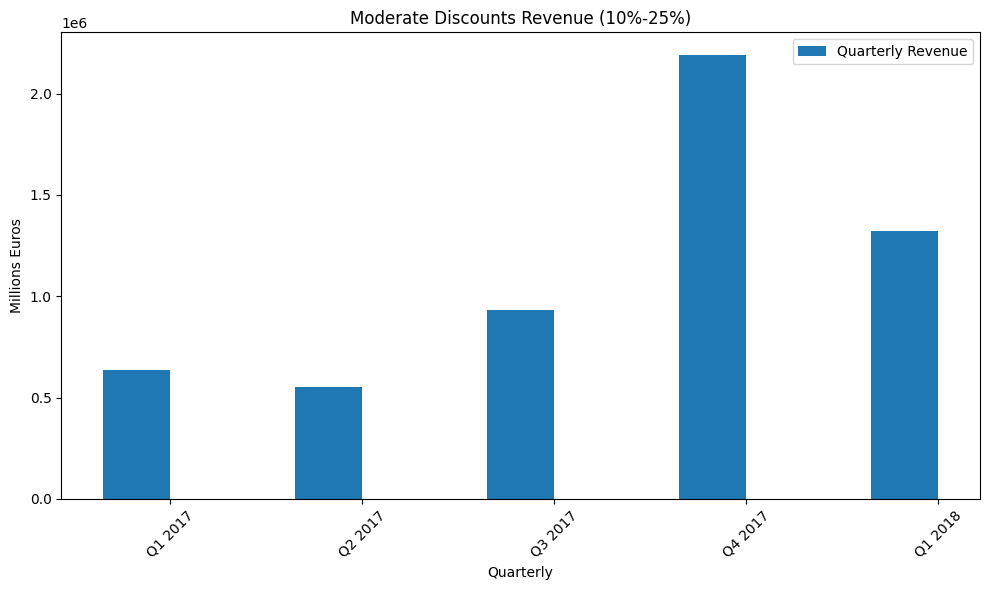

In [ ]:
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(products_gd_moderate['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ave_total_bars = ax.bar(indices,products_gd_moderate['total'], bar_width, label='Quarterly Revenue')


# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(products_gd_moderate['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarterly')
ax.set_ylabel('Millions Euros')
ax.set_title('Moderate Discounts Revenue (10%-25%)')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


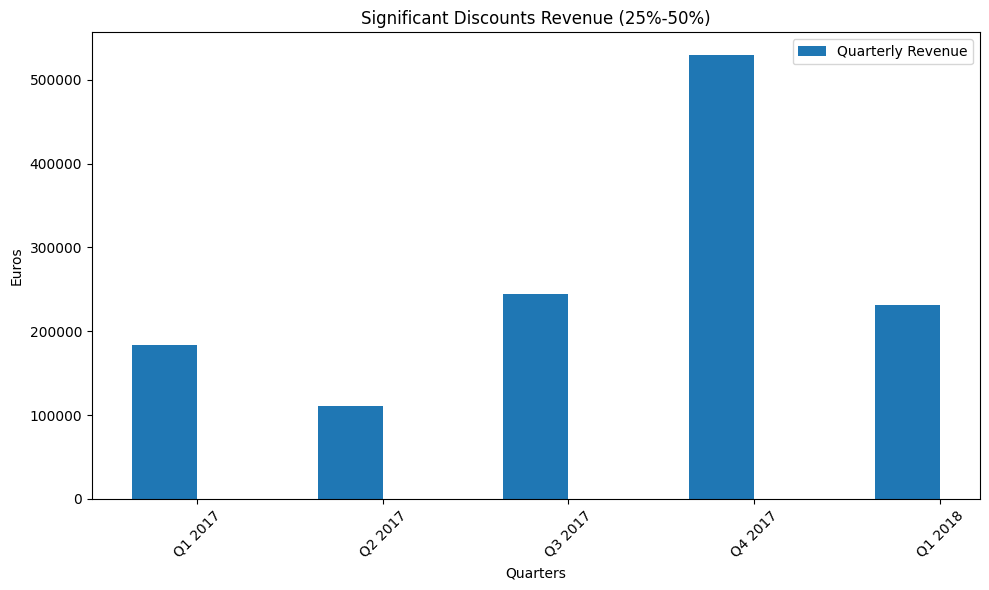

In [ ]:
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(products_gd_significant['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ave_total_bars = ax.bar(indices,products_gd_significant['total'], bar_width, label='Quarterly Revenue')


# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(products_gd_significant['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarters')
ax.set_ylabel('Euros')
ax.set_title('Significant Discounts Revenue (25%-50%)')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


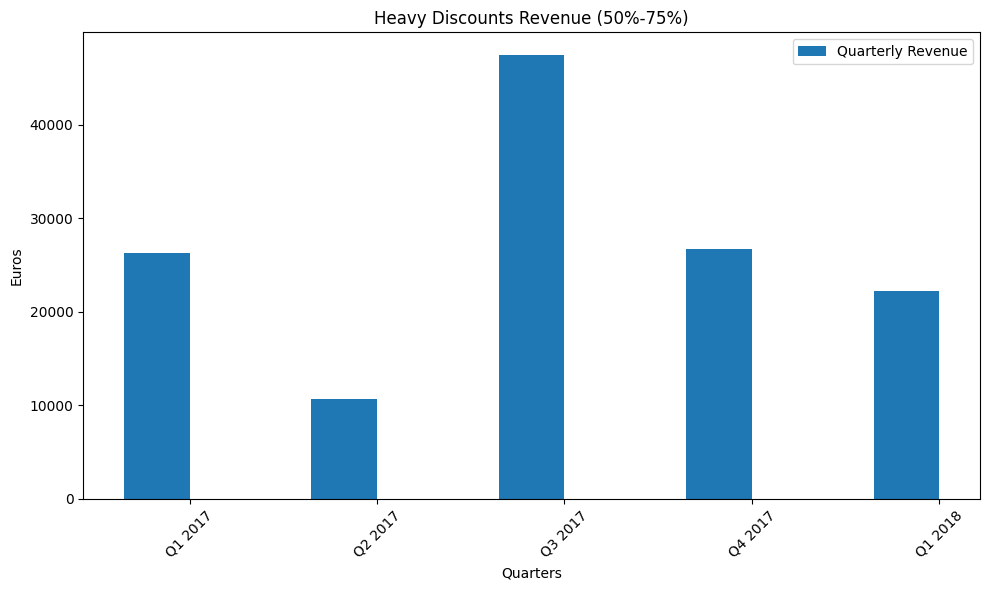

In [ ]:
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(products_gd_heavy['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ave_total_bars = ax.bar(indices,products_gd_heavy['total'], bar_width, label='Quarterly Revenue')


# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(products_gd_heavy['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarters')
ax.set_ylabel('Euros')
ax.set_title('Heavy Discounts Revenue (50%-75%)')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

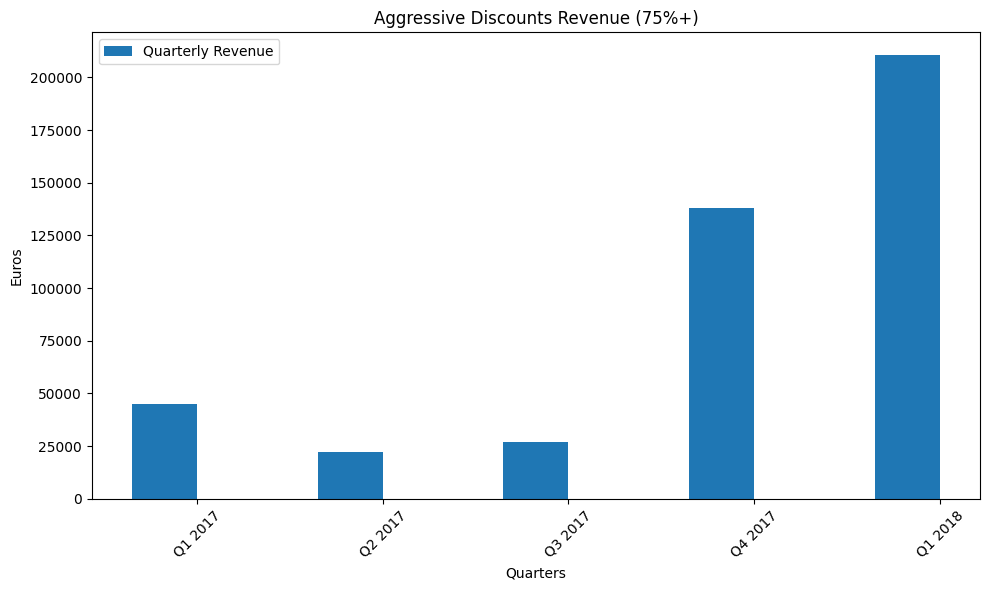

In [ ]:
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(products_gd_aggressive['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ave_total_bars = ax.bar(indices,products_gd_aggressive['total'], bar_width, label='Quarterly Revenue')


# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(products_gd_aggressive['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarters')
ax.set_ylabel('Euros')
ax.set_title('Aggressive Discounts Revenue (75%+)')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

#Quality Assessment

####Exclude unwanted orders

In [ ]:
orderlines_g2 =(
                orderlines_g.merge(
                    orders_g,
                    how="inner",
                    left_on="id_order",
                    right_on="order_id"
                    )
                [['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date']]
                )


In [ ]:
orders_g2 =(
                orders_g.merge(
                    orderlines_g.groupby('id_order').count(),
                    how="inner",
                    left_on="order_id",
                    right_on="id_order"
                    )
                [['order_id', 'created_date', 'total_paid', 'state']]
                )

In [ ]:
orderlines_g2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62103 entries, 0 to 62102
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                62103 non-null  int64         
 1   id_order          62103 non-null  int64         
 2   product_id        62103 non-null  int64         
 3   product_quantity  62103 non-null  int64         
 4   sku               62103 non-null  object        
 5   unit_price        62103 non-null  float64       
 6   date              62103 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
orderlines_g2.nunique()

id                  62103
id_order            46560
product_id              1
product_quantity       27
sku                  6048
unit_price           6274
date                61352
dtype: int64

In [ ]:
orderlines_g2.groupby('id_order').count()

,id,product_id,product_quantity,sku,unit_price,date
id_order,,,,,,
241423,1,1,1,1,1,1
242832,1,1,1,1,1,1
243330,1,1,1,1,1,1
245275,1,1,1,1,1,1
245595,1,1,1,1,1,1
...,...,...,...,...,...,...
527042,1,1,1,1,1,1
527070,1,1,1,1,1,1
527074,1,1,1,1,1,1


In [ ]:
orders_g2

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
46555,527042,2018-03-14 11:47:50,18.98,Completed
46556,527070,2018-03-14 11:50:48,24.97,Completed
46557,527074,2018-03-14 11:51:42,24.97,Completed
46558,527096,2018-03-14 11:58:40,34.96,Completed


In [ ]:
orders_g2.nunique()

order_id        46560
created_date    46461
total_paid      12829
state               1
dtype: int64

####Exclude orders with unknown products

In [ ]:
orderlines_g3 = (
                  products_g.merge(
                      orderlines_g2,
                      how="inner",
                      on="sku"
                      )
                  )


In [ ]:
orderlines_g3 = orderlines_g3.loc[~orderlines_g3.name.isna(), ('id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price', 'date')]

In [ ]:
orderlines_g3.nunique()

id                  60905
id_order            45961
product_id              1
product_quantity       25
sku                  5905
unit_price           6206
date                60220
dtype: int64

In [ ]:
orders_g3 =(
                orders_g2.merge(
                    orderlines_g3.groupby('id_order').count(),
                    how="inner",
                    left_on="order_id",
                    right_on="id_order"
                    )
                [['order_id', 'created_date', 'total_paid', 'state']]
                )

In [ ]:
orders_g3.nunique()

order_id        45961
created_date    45863
total_paid      12764
state               1
dtype: int64

#### Explore the revenue from different tables

In [ ]:
# your code here
orderlines_g3['unit_price_total'] = orderlines_g3['unit_price']*orderlines_g3['product_quantity']
orderlines_g3

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1121326,300551,0,1,RAI0007,54.99,2017-01-02 13:34:30,54.99
1,1149253,310820,0,1,RAI0007,49.99,2017-01-17 09:37:43,49.99
2,1149773,311042,0,1,RAI0007,49.99,2017-01-17 15:55:39,49.99
3,1181573,324568,0,1,RAI0007,54.99,2017-02-15 13:36:16,54.99
4,1188189,327565,0,1,RAI0007,54.99,2017-02-22 13:01:25,54.99
...,...,...,...,...,...,...,...,...
60900,1499671,464365,0,1,MMW0015,22.99,2017-12-16 14:38:57,22.99
60901,1523146,475426,0,1,MMW0015,19.54,2017-12-28 20:24:02,19.54
60902,1559235,490325,0,2,MMW0015,22.99,2018-01-13 23:08:33,45.98
60903,1596455,496812,0,1,MMW0015,22.99,2018-02-02 14:23:53,22.99


In [ ]:
# your code here
orderlines_g3.groupby('id_order', as_index=False)['unit_price_total'].sum()

,id_order,unit_price_total
0,241423,129.16
1,242832,10.77
2,243330,77.99
3,245275,149.00
4,245595,105.98
...,...,...
45956,527042,13.99
45957,527070,19.98
45958,527074,19.98
45959,527096,29.97


In [ ]:
# your code here
orders_g4 =(
                orders_g3.merge(
                    orderlines_g3.groupby('id_order', as_index=False)['unit_price_total'].sum(),
                    how="inner",
                    left_on="order_id",
                    right_on="id_order"
                    )
                [['order_id', 'created_date', 'total_paid', 'state', 'unit_price_total']]
                )

In [ ]:
orders_g4['diff'] = orders_g4['total_paid'] - orders_g4['unit_price_total']

In [ ]:
orders_g4

,order_id,created_date,total_paid,state,unit_price_total,diff
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
45956,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
45957,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
45958,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
45959,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


In [ ]:
orders_g4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45961 entries, 0 to 45960
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          45961 non-null  int64         
 1   created_date      45961 non-null  datetime64[ns]
 2   total_paid        45961 non-null  float64       
 3   state             45961 non-null  object        
 4   unit_price_total  45961 non-null  float64       
 5   diff              45961 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
orders_g4['diff'].mean().round(2)

5.21

In [ ]:
# your code here
# calculate the quartiles
Q1 = orders_g4['diff'].quantile(0.25)
Q3 = orders_g4['diff'].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = orders_g4.loc[(orders_g4['diff'] >= (Q1 - 1.5*IQR)) & (orders_g4['diff'] <= (Q3 + 1.5*IQR))]

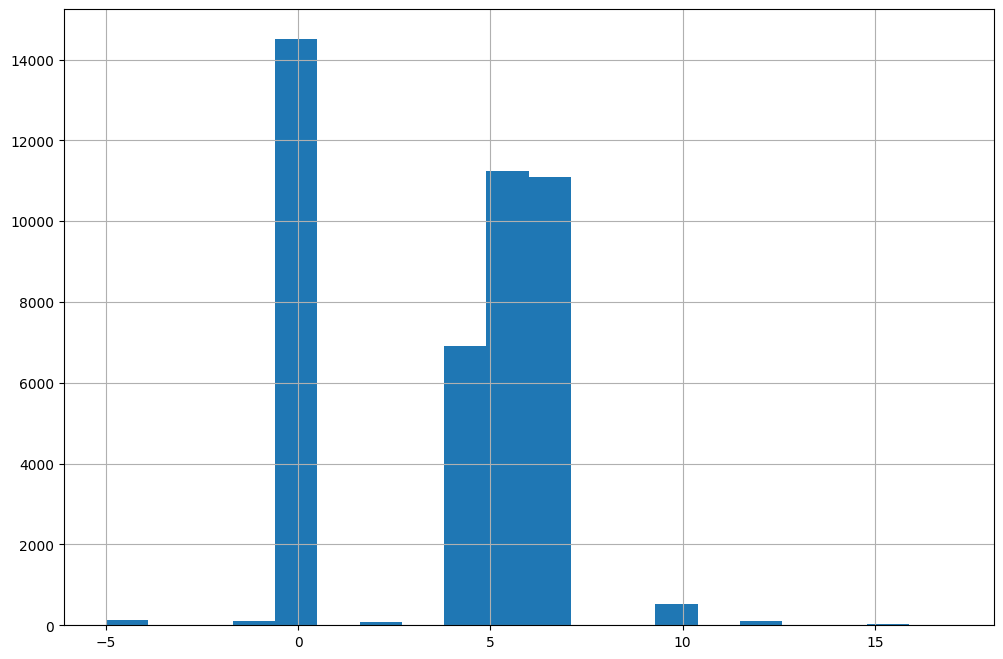

In [ ]:
diff_no_outliers_df['diff'].hist(bins= 20, figsize=(12,8));

In [ ]:
normal_diff_list = list(diff_no_outliers_df["order_id"].unique())

In [ ]:
orders_g5 = orders_g4.loc[orders_g4["order_id"].isin(normal_diff_list), :]
orderlines_g4 = orderlines_g3.loc[orderlines_g3["id_order"].isin(normal_diff_list), :]

In [ ]:
len(orders_g5["order_id"].unique()), len(orderlines_g4["id_order"].unique())

(44817, 44817)

In [ ]:
orders_gqu = orders_g5

In [ ]:
orderlines_gqu = orderlines_g4

In [ ]:
orderlines_gqu

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1121326,300551,0,1,RAI0007,54.99,2017-01-02 13:34:30,54.99
1,1149253,310820,0,1,RAI0007,49.99,2017-01-17 09:37:43,49.99
2,1149773,311042,0,1,RAI0007,49.99,2017-01-17 15:55:39,49.99
3,1181573,324568,0,1,RAI0007,54.99,2017-02-15 13:36:16,54.99
4,1188189,327565,0,1,RAI0007,54.99,2017-02-22 13:01:25,54.99
...,...,...,...,...,...,...,...,...
60900,1499671,464365,0,1,MMW0015,22.99,2017-12-16 14:38:57,22.99
60901,1523146,475426,0,1,MMW0015,19.54,2017-12-28 20:24:02,19.54
60902,1559235,490325,0,2,MMW0015,22.99,2018-01-13 23:08:33,45.98
60903,1596455,496812,0,1,MMW0015,22.99,2018-02-02 14:23:53,22.99


In [ ]:
orders_gqu['diff'].mean().round(2)

3.76

#Data Analysis

###Discounts

In [ ]:
products_g

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,49.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,56.99,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,23.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,26.99,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,64.99,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,64.99,0,1392


In [ ]:
products_gd = (
            products_g.merge(
                orderlines_gqu,
                how="inner",
                on="sku"
                )
            [['id_order', 'date','product_quantity', 'unit_price', 'name', 'sku', 'price', 'promo_price']]
            )



In [ ]:
products_gd

,id_order,date,product_quantity,unit_price,name,sku,price,promo_price
0,300551,2017-01-02 13:34:30,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
1,310820,2017-01-17 09:37:43,1,49.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
2,311042,2017-01-17 15:55:39,1,49.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
3,324568,2017-02-15 13:36:16,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
4,327565,2017-02-22 13:01:25,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
...,...,...,...,...,...,...,...,...
59073,464365,2017-12-16 14:38:57,1,22.99,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99
59074,475426,2017-12-28 20:24:02,1,19.54,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99
59075,490325,2018-01-13 23:08:33,2,22.99,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99
59076,496812,2018-02-02 14:23:53,1,22.99,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99


In [ ]:
products_gd.nunique()

id_order            44817
date                58413
product_quantity       25
unit_price           5767
name                 5806
sku                  5853
price                1435
promo_price          2310
dtype: int64

In [ ]:
products_gd = products_gd.drop_duplicates()

In [ ]:
products_gd.head()

,id_order,date,product_quantity,unit_price,name,sku,price,promo_price
0,300551,2017-01-02 13:34:30,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
1,310820,2017-01-17 09:37:43,1,49.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
2,311042,2017-01-17 15:55:39,1,49.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
3,324568,2017-02-15 13:36:16,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99
4,327565,2017-02-22 13:01:25,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99


In [ ]:
products_gd["discount"] = products_gd["price"] - products_gd["unit_price"]

In [ ]:
products_gd['discount_percentage'] = products_gd['discount']/products_gd['price']*100

In [ ]:
products_gd

,id_order,date,product_quantity,unit_price,name,sku,price,promo_price,discount,discount_percentage
0,300551,2017-01-02 13:34:30,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99,5.00,8.334722
1,310820,2017-01-17 09:37:43,1,49.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99,10.00,16.669445
2,311042,2017-01-17 15:55:39,1,49.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99,10.00,16.669445
3,324568,2017-02-15 13:36:16,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99,5.00,8.334722
4,327565,2017-02-22 13:01:25,1,54.99,Silver Rain Design mStand Support,RAI0007,59.99,49.99,5.00,8.334722
...,...,...,...,...,...,...,...,...,...,...
59073,464365,2017-12-16 14:38:57,1,22.99,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99,7.00,23.341114
59074,475426,2017-12-28 20:24:02,1,19.54,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99,10.45,34.844948
59075,490325,2018-01-13 23:08:33,2,22.99,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99,7.00,23.341114
59076,496812,2018-02-02 14:23:53,1,22.99,"My MW Case MacBook Pro 13 ""(Late 2016) Gray",MMW0015,29.99,20.99,7.00,23.341114


In [ ]:
products_gd['total'] =products_gd['unit_price'] * products_gd['product_quantity']

In [ ]:
products_gd['unit_price'].sum()

14545458.579999998

In [ ]:
products_gd['total'].sum()

15328236.209999999

# Data Visualization

In [ ]:
average_discounts_and_total = products_gd.resample("M", on="date").agg({'total':'sum', 'discount_percentage':'mean'})

In [ ]:
average_discounts_and_total = average_discounts_and_total.reset_index()

In [ ]:
average_discounts_and_total['ave_total_percentage_from_all_revenue'] = (average_discounts_and_total['total'])/(average_discounts_and_total['total'].sum())*100

In [ ]:
average_discounts_and_total['date_month_year'] = average_discounts_and_total['date'].dt.strftime("%B %Y")

In [ ]:
average_discounts_and_total #This is the one Asif

,date,total,discount_percentage,ave_total_percentage_from_all_revenue,date_month_year
0,2017-01-31,1134457.57,26.183572,7.401097,January 2017
1,2017-02-28,591838.72,20.916324,3.861101,February 2017
2,2017-03-31,113953.68,19.519266,0.743423,March 2017
3,2017-04-30,478462.04,19.052685,3.121442,April 2017
4,2017-05-31,613219.30,16.497392,4.000586,May 2017
5,2017-06-30,658834.58,17.868925,4.298176,June 2017
6,2017-07-31,1085473.94,24.966805,7.081532,July 2017
7,2017-08-31,695189.06,21.345130,4.535349,August 2017
8,2017-09-30,838695.45,20.710106,5.471572,September 2017
9,2017-10-31,1050304.94,22.394470,6.852093,October 2017


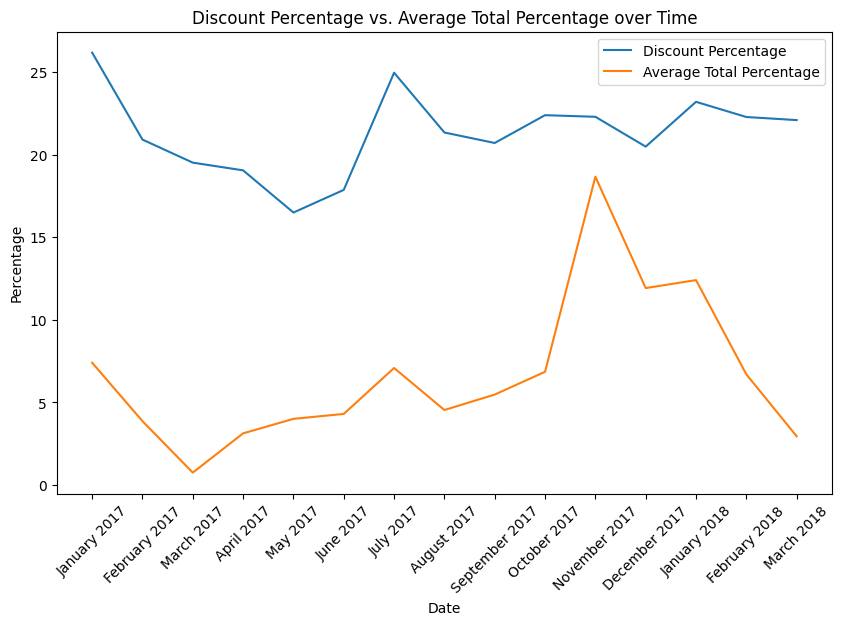

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(average_discounts_and_total['date_month_year'], average_discounts_and_total['discount_percentage'], label='Discount Percentage')
plt.plot(average_discounts_and_total['date_month_year'], average_discounts_and_total['ave_total_percentage_from_all_revenue'], label='Average Total Percentage')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Discount Percentage vs. Average Total Percentage over Time')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.show()


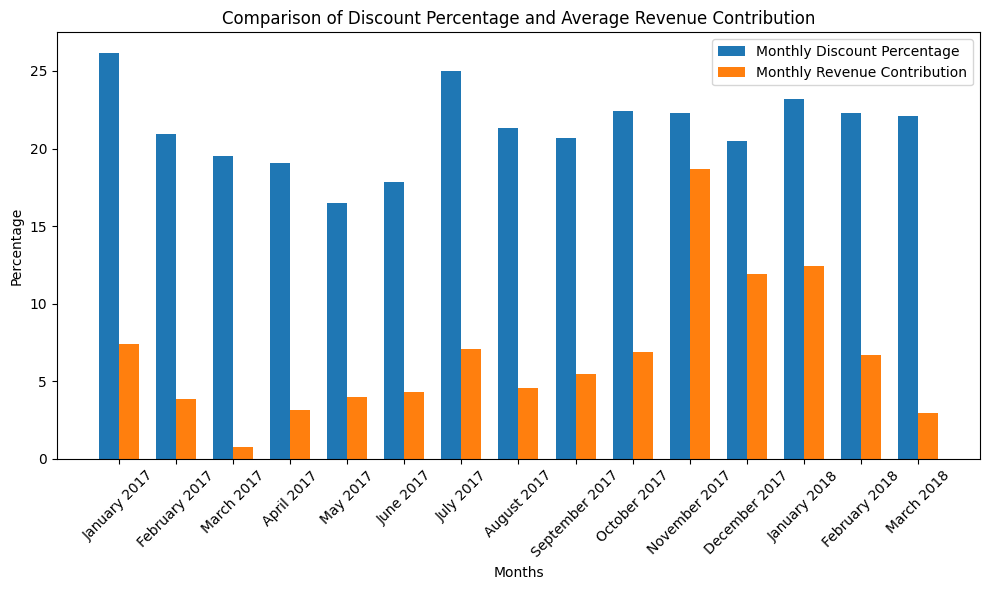

In [ ]:

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(average_discounts_and_total['date_month_year']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
discount_bars = ax.bar(indices, average_discounts_and_total['discount_percentage'], bar_width, label='Monthly Discount Percentage')
ave_total_bars = ax.bar(indices + bar_width, average_discounts_and_total['ave_total_percentage_from_all_revenue'], bar_width, label='Monthly Revenue Contribution')

# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(average_discounts_and_total['date_month_year'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Months')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Discount Percentage and Average Revenue Contribution')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
average_discounts_and_total_q = products_gd.resample("Q", on="date").agg({'total':'sum', 'discount_percentage':'mean'})
average_discounts_and_total_q = average_discounts_and_total_q.reset_index()
average_discounts_and_total_q['ave_total_percentage_from_all_revenue'] = (average_discounts_and_total_q['total'])/(average_discounts_and_total_q['total'].sum())*100
average_discounts_and_total_q['quarter'] = average_discounts_and_total_q['date'].dt.quarter
average_discounts_and_total_q['quarter'] = 'Q' + (average_discounts_and_total_q['quarter']).astype(str) +" " + (average_discounts_and_total_q['date'].dt.strftime("%Y"))

In [ ]:
average_discounts_and_total_q['total'].sum()

15328236.21

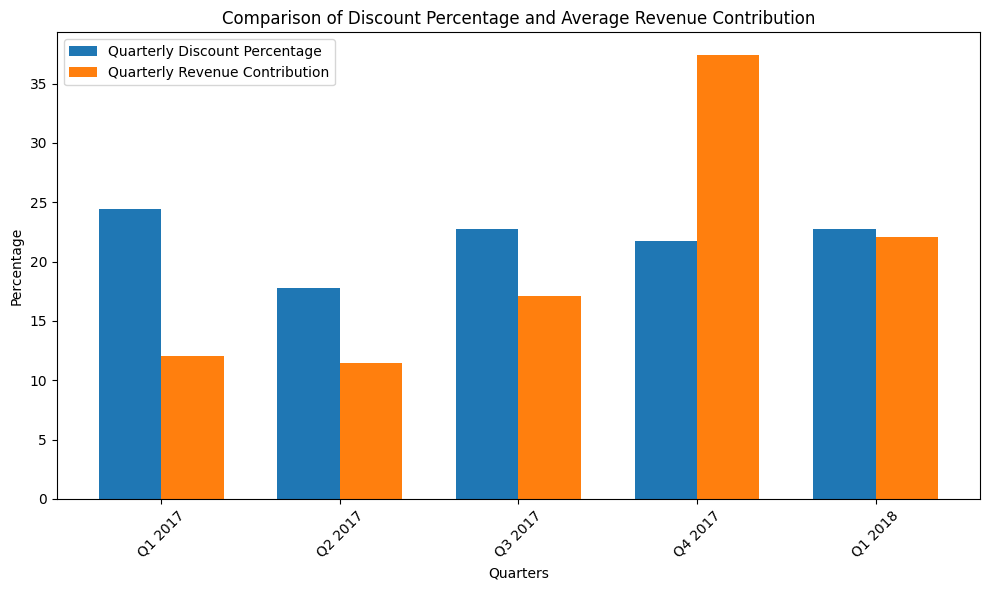

In [ ]:

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(average_discounts_and_total_q['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
discount_bars = ax.bar(indices, average_discounts_and_total_q['discount_percentage'], bar_width, label='Quarterly Discount Percentage')
ave_total_bars = ax.bar(indices + bar_width, average_discounts_and_total_q['ave_total_percentage_from_all_revenue'], bar_width, label='Quarterly Revenue Contribution')

# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(average_discounts_and_total_q['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarters')
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Discount Percentage and Average Revenue Contribution')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


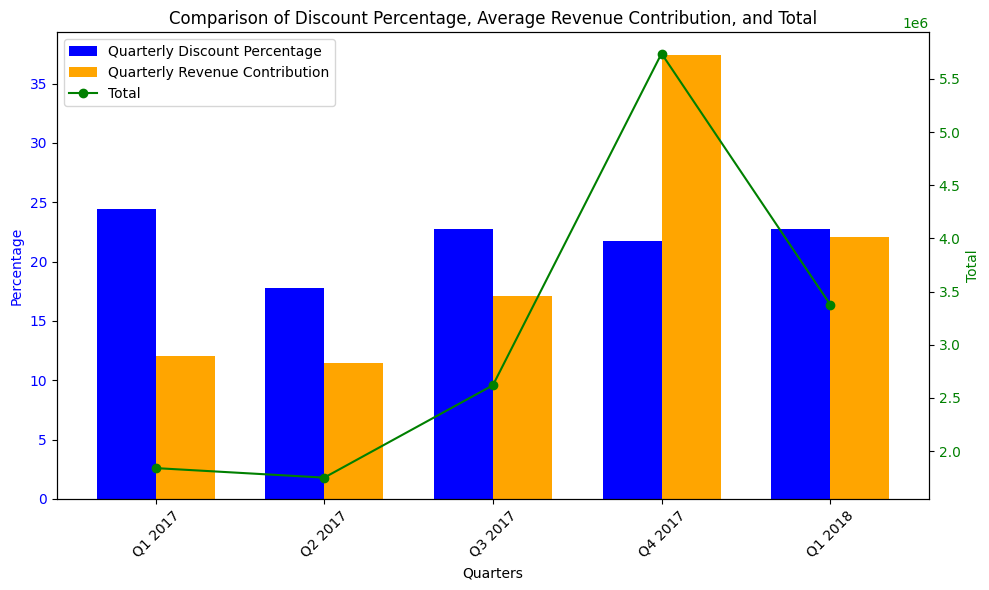

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(average_discounts_and_total_q['quarter']))

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

discount_bars = ax1.bar(indices, average_discounts_and_total_q['discount_percentage'], bar_width, label='Quarterly Discount Percentage', color='blue')
ave_total_bars = ax1.bar(indices + bar_width, average_discounts_and_total_q['ave_total_percentage_from_all_revenue'], bar_width, label='Quarterly Revenue Contribution', color='orange')

# Plot the total column on the secondary y-axis
total_line, = ax2.plot(indices + bar_width / 2, average_discounts_and_total_q['total'], color='green', marker='o', linestyle='-', label='Total')

# Set the x-axis ticks and labels
ax1.set_xticks(indices + bar_width / 2)
ax1.set_xticklabels(average_discounts_and_total_q['quarter'], rotation=45)

# Set the axis labels and title
ax1.set_xlabel('Quarters')
ax1.set_ylabel('Percentage', color='blue')
ax2.set_ylabel('Total', color='green')
ax1.set_title('Comparison of Discount Percentage, Average Revenue Contribution, and Total')

# Set the color of the tick labels
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='green')

# Add a legend
bars = [discount_bars, ave_total_bars, total_line]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
average_discounts_and_total['discount_percentage'].mean()

21.32159884333748

In [ ]:
average_discounts_and_total_q = products_gd.resample("Q", on="date").agg({'total':'sum', 'discount_percentage':'mean'})
average_discounts_and_total_q = average_discounts_and_total_q.reset_index()
average_discounts_and_total_q['ave_total_percentage_from_all_revenue'] = (average_discounts_and_total_q['total'])/(average_discounts_and_total_q['total'].sum())*100
average_discounts_and_total_q['quarter'] = average_discounts_and_total_q['date'].dt.quarter
average_discounts_and_total_q['quarter'] = 'Q' + (average_discounts_and_total_q['quarter']).astype(str) +" " + (average_discounts_and_total_q['date'].dt.strftime("%Y"))

In [ ]:
products_gd_zero = products_gd.loc[products_gd['discount_percentage'] == 0,:]
products_gd_low = products_gd.loc[(products_gd['discount_percentage'] > 0) & (products_gd['discount_percentage'] <= 10),:]
products_gd_moderate = products_gd.loc[(products_gd['discount_percentage'] > 10) & (products_gd['discount_percentage'] <= 25),:]
products_gd_significant = products_gd.loc[(products_gd['discount_percentage'] > 25) & (products_gd['discount_percentage'] <= 50),:]
products_gd_heavy = products_gd.loc[(products_gd['discount_percentage'] > 50) & (products_gd['discount_percentage'] <= 75),:]
products_gd_aggressive = products_gd.loc[products_gd['discount_percentage'] > 75 ,:]

In [ ]:
products_gd_zero = products_gd_zero.resample("Q", on="date").agg({'total':'sum'})
products_gd_low = products_gd_low.resample("Q", on="date").agg({'total':'sum'})
products_gd_moderate = products_gd_moderate.resample("Q", on="date").agg({'total':'sum'})
products_gd_significant = products_gd_significant.resample("Q", on="date").agg({'total':'sum'})
products_gd_heavy = products_gd_heavy.resample("Q", on="date").agg({'total':'sum'})
products_gd_aggressive = products_gd_aggressive.resample("Q", on="date").agg({'total':'sum'})

In [ ]:
products_gd_zero = products_gd_zero.reset_index()
products_gd_low = products_gd_low.reset_index()
products_gd_moderate = products_gd_moderate.reset_index()
products_gd_significant = products_gd_significant.reset_index()
products_gd_heavy = products_gd_heavy.reset_index()
products_gd_aggressive = products_gd_aggressive.reset_index()

In [ ]:
products_gd_zero['quarter'] = products_gd_zero['date'].dt.quarter
products_gd_low['quarter'] = products_gd_low['date'].dt.quarter
products_gd_moderate['quarter'] = products_gd_moderate['date'].dt.quarter
products_gd_significant['quarter'] = products_gd_significant['date'].dt.quarter
products_gd_heavy['quarter'] = products_gd_heavy['date'].dt.quarter
products_gd_aggressive['quarter'] = products_gd_aggressive['date'].dt.quarter

In [ ]:
products_gd_zero['quarter'] = 'Q' + (products_gd_zero['quarter']).astype(str) +" " + (products_gd_zero['date'].dt.strftime("%Y"))
products_gd_low['quarter'] = 'Q' + (products_gd_low['quarter']).astype(str) +" " + (products_gd_low['date'].dt.strftime("%Y"))
products_gd_moderate['quarter'] = 'Q' + (products_gd_moderate['quarter']).astype(str) +" " + (products_gd_moderate['date'].dt.strftime("%Y"))
products_gd_significant['quarter'] = 'Q' + (products_gd_significant['quarter']).astype(str) +" " + (products_gd_significant['date'].dt.strftime("%Y"))
products_gd_heavy['quarter'] = 'Q' + (products_gd_heavy['quarter']).astype(str) +" " + (products_gd_heavy['date'].dt.strftime("%Y"))
products_gd_aggressive['quarter'] = 'Q' + (products_gd_aggressive['quarter']).astype(str) +" " + (products_gd_aggressive['date'].dt.strftime("%Y"))

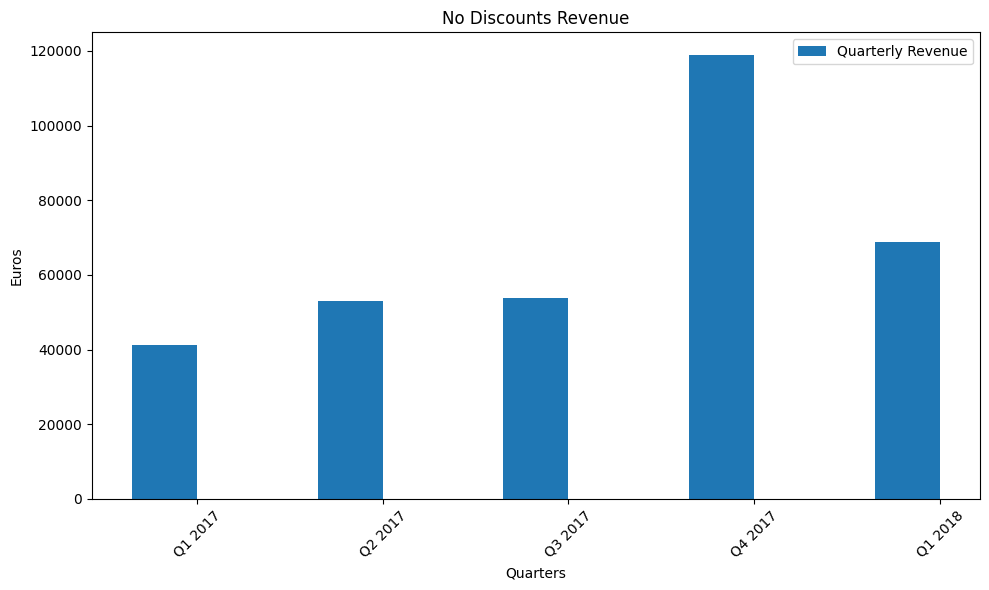

In [ ]:
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(products_gd_zero['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ave_total_bars = ax.bar(indices,products_gd_zero['total'], bar_width, label='Quarterly Revenue')


# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(products_gd_zero['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarters')
ax.set_ylabel('Euros')
ax.set_title('No Discounts Revenue')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


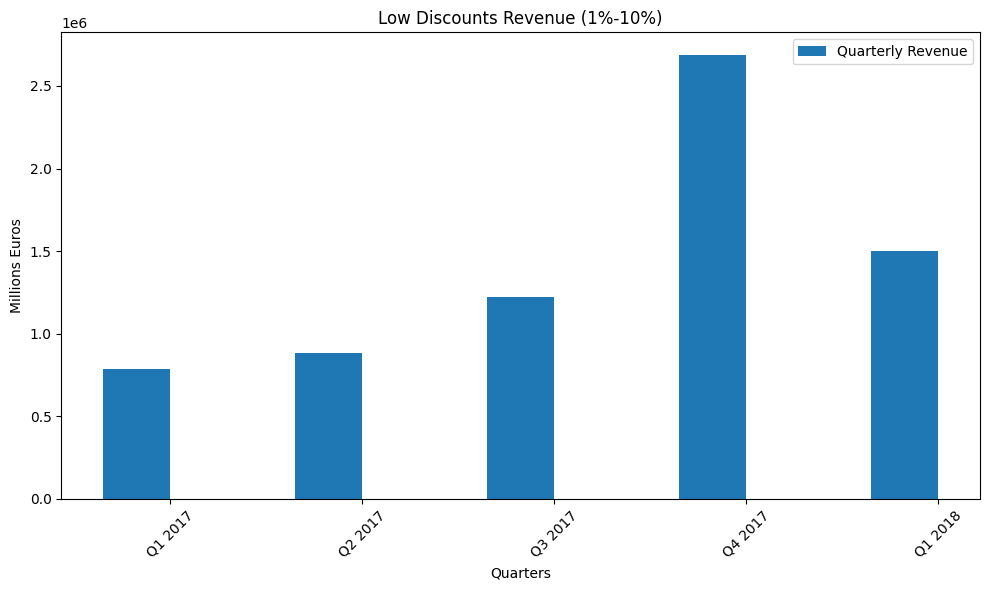

In [ ]:
# Set the width of the bars
bar_width = 0.35

# Create an array of indices for x-axis
indices = np.arange(len(products_gd_low['quarter']))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ave_total_bars = ax.bar(indices,products_gd_low['total'], bar_width, label='Quarterly Revenue')


# Set the x-axis ticks and labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(products_gd_low['quarter'], rotation=45)

# Set the axis labels and title
ax.set_xlabel('Quarters')
ax.set_ylabel('Millions Euros')
ax.set_title('Low Discounts Revenue (1%-10%)')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
